In [22]:
import Bio.SeqIO as IO
from tqdm.auto import tqdm
import numpy as np 
import pandas as pd

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
species= ['CIOIN', 'LEPOC', 'DANRE', 'SALTR', 'GADMO', 'ORYLA', 'ECNAU', 'ERCAL', 'XENTR', 'CHPIB', 'CHICK', 'KAKAP', 'TAEGU', 'PODMU', 'ORANA', 'SARHA', 'HUMAN', 'MOUSE', 'FELCA', 'PHOSI']

In [4]:
stats2=pd.read_csv('ProtLengthStats_canonical_4methods.csv')
print(stats2)
from pandas.api.types import CategoricalDtype

speciesorder = CategoricalDtype(['CIOIN', 'LEPOC', 'DANRE', 'SALTR', 'GADMO', 'ORYLA', 'ECNAU', 'ERCAL', 'XENTR', 'CHPIB', 'CHICK', 'KAKAP', 'TAEGU', 'PODMU', 'ORANA', 'SARHA', 'HUMAN', 'MOUSE', 'FELCA', 'PHOSI'], ordered=True)
stats2['Species'] = stats2['Species'].astype(speciesorder)
stats2=stats2.sort_values('Species')

methodorder=CategoricalDtype(['Ab-initio','Reference proteomes UniProt', 'NCBI', 'Ensembl'])
stats2['Method']=stats2['Method'].astype(methodorder)
stats2=stats2.sort_values('Method')



   Species                       Method    count        mean         std  \
0    CHICK                    Ab-initio  18050.0  540.498837  611.956700   
1    CHICK                      Ensembl  16878.0  542.719457  499.343611   
2    CHICK                         NCBI  17477.0  561.258568  533.220707   
3    CHICK  Reference proteomes UniProt  18112.0  558.378368  510.274309   
4    CHPIB                    Ab-initio  91991.0  293.629268  297.042868   
..     ...                          ...      ...         ...         ...   
75   TAEGU  Reference proteomes UniProt  16489.0  597.352295  521.878237   
76   XENTR                    Ab-initio  40554.0  442.507052  542.063947   
77   XENTR                      Ensembl  22107.0  551.210341  508.164234   
78   XENTR                         NCBI  21826.0  559.763860  582.093613   
79   XENTR  Reference proteomes UniProt  22099.0  575.223042  593.632437   

     min    25%    50%    75%      max  
0   28.0  216.0  376.0  665.0  37618.0  
1    

In [5]:
pd.set_option('display.max_rows', None)
#stats2

In [7]:
##stats2=stats2.drop(columns=['Orthologs', 'Total_relationships'])

In [10]:
## Orthologs counting

path1='/work/FAC/FBM/DBC/cdessim2/default/sprietob/'
metfol =['OMAAugustus20', 'OMARP20', 'OMAtopNCBI20', 'OMAtopEnsembl20']
path2='/Output/PairwiseOrthologs/'

codes=['CIOIN', 'LEPOC', 'DANRE', 'SALTR', 'GADMO', 'ORYLA', 'ECNAU', 'ERCAL', 'XENTR', 'CHPIB', 'CHICK', 'KAKAP', 'TAEGU', 'PODMU', 'ORANA', 'SARHA', 'HUMAN', 'MOUSE', 'FELCA', 'PHOSI']


import os
from collections import defaultdict

# Initialize 'Orthologs' and 'Total_relationships' columns with default values
stats2['Orthologs'] = 0
stats2['Total_relationships'] = 0

relstotals = []
ortotals = []
spe=[]
metodo=[]


for mf in metfol:

    orthologs=defaultdict(lambda: defaultdict(int))
    fns = os.listdir(path1+mf+path2)
    
    for fn in fns:
        z = fn.split('.')[0].split('-')
        if len(z) == 2:
            (sp1, sp2) = z
        else:
            # not pairwise file
            continue
        f=open(path1+mf+path2+fn,'r')
        lines= f.readlines()[4:]
        for l in lines:
            gene1= l.split('\t')[2].split()[0]
            gene2= l.split('\t')[3].split()[0]
            orthologs[sp1][gene1]+=1
            orthologs[sp2][gene2]+=1
        
    for c in codes:
        ortotal=len(orthologs[c])
        relstotal=sum(list(orthologs[c].values()))
        relsavg=relstotal/relstotal

        ortotals.append(ortotal)
        relstotals.append(relstotal)
        spe.append(c)
        metodo.append(mf)
        
ortholognumbers=pd.DataFrame({'Method': metodo, 'Species': spe, 'Orthologues_total': ortotals, 'Relationships_total': relstotals})

In [38]:
#ortholognumbers.to_csv('Ortholog_numbers.csv')
ortholognumbers=pd.read_csv('Ortholog_numbers.csv')

In [9]:
#methodsrename=pd.DataFrame({'Software': ['OMAAugustus20', 'OMARP20', 'OMAprimEnsembl20','OMAtopEnsembl20','OMAprimNCBI20','OMAtopNCBI20'], 
 #                          'Method':['Ab-initio', 'Reference proteomes UniProt', 'primEnsembl', 'Ensembl','primNCBI', 'NCBI']})
#ortholognumbers['Method']= ortholognumbers['Method'].map(methodsrename.set_index('Software')['Method'])

In [39]:
ortholognumbers=ortholognumbers.drop(columns='Unnamed: 0')

In [5]:
#with pd.option_context('display.max_rows', None,
 #                      'display.max_columns', None,
  #                     'display.precision', 3,
   #                    ):
    #print(ortholognumbers)


In [8]:
stats2.groupby('Method')['count'].sum()

Method
NCBI                           426843.0
Reference proteomes UniProt    428196.0
Ensembl                        436713.0
Ab-initio                      645378.0
Name: count, dtype: float64

In [10]:
#statsmerge = stats2.merge(ortholognumbers)

In [13]:
#statsmerge

,Species,Method,count,mean,std,min,25%,50%,75%,max,Orthologues_total,Relationships_total,Orthologs_norm,Relats_perOrth,Relats_perGene
0,CIOIN,Ab-initio,13196.0,587.237875,667.740078,36.0,236.0,418.0,717.0,33420.0,6547,100538,0.496135,15.356346,7.618824
1,CIOIN,Reference proteomes UniProt,16680.0,322.028777,347.341120,21.0,144.0,236.0,415.0,21338.0,7452,178245,0.446763,23.919082,10.686151
2,CIOIN,NCBI,13627.0,512.347912,520.487474,35.0,245.0,393.0,616.0,26404.0,8254,247412,0.605709,29.974800,18.156014
3,CIOIN,Ensembl,16671.0,321.240957,346.229801,21.0,144.0,236.0,414.0,21338.0,7467,185286,0.447904,24.813982,11.114270
4,LEPOC,Ab-initio,36227.0,360.272283,416.437873,17.0,137.0,226.0,429.0,22541.0,15308,179561,0.422558,11.729880,4.956552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,FELCA,Reference proteomes UniProt,19652.0,563.930389,554.057233,13.0,264.0,423.0,690.0,27108.0,18385,384469,0.935528,20.912102,19.563861
76,PHOSI,Reference proteomes UniProt,18892.0,536.783242,509.399713,24.0,230.0,405.0,662.0,8798.0,17725,299045,0.938228,16.871368,15.829187
77,PHOSI,NCBI,19069.0,563.881535,583.314773,35.0,259.0,421.0,683.0,34346.0,18288,545257,0.959043,29.815015,28.593896
78,PHOSI,Ensembl,18962.0,522.826179,495.894731,24.0,224.0,395.0,643.0,8798.0,17901,322722,0.944046,18.028155,17.019407


In [19]:
#statsmerge['Orthologs_norm']=statsmerge['Orthologues_total']/statsmerge['count']
#statsmerge['Relats_perOrth']=statsmerge['Relationships_total']/statsmerge['Orthologues_total']
#statsmerge['Relats_perGene']=statsmerge['Relationships_total']/statsmerge['count']

In [6]:
#statsmerge.to_csv('Statsmerge.csv')
statsmerge=pd.read_csv('Statsmerge.csv')
statsmerge=statsmerge.drop(columns='Unnamed: 0')

In [8]:
statstolength=pd.DataFrame()
statstolength['Species']=statsmerge['Species']
statstolength['Method']=statsmerge['Method']
statstolength['Prop_orth']=statsmerge['Orthologs_norm']

In [10]:
statstolength['Method'] = statstolength['Method'].replace('Reference proteomes UniProt', 'UniProt')

In [12]:
result=pd.read_csv('resultmedian.csv')

In [14]:
corr=pd.DataFrame({'Code': ['CIOIN', 'LEPOC', 'DANRE', 'SALTR', 'GADMO', 'ORYLA', 'ECNAU', 'ERCAL', 'XENTR', 'CHPIB', 'CHICK', 'KAKAP', 
                            'TAEGU', 'PODMU', 'ORANA', 'SARHA', 'HUMAN', 'MOUSE', 'FELCA', 'PHOSI'],
                   'Especies': ['C. intestinalis (vase tunicate)', 'L. oculatus (spotted gar)', 'D. rerio (zebrafish)', 
              'S. trutta (brown trout)','G. morhua (Atlantic cod)', 'O. latipes (medaka fish)', 'E. naucrates (live sharksucker)',
              'E. calabaricus (reedfish)', 'X. tropicalis (western clawed frog)', 'C. p. bellii (painted turtle)',
              'G. gallus (chicken)', 'S. habroptila (kakapo)', 'T. guttata (zebra finch)', 
              'P. muralis (wall lizard)','O. anatinus (platypus)', 'S. harrisii (tasmanian devil)', 
              'H. sapiens (human)', 'M. musculus (house mouse)', 'F. catus (domestic cat)', 'P. sinus (vaquita)']})

In [15]:
statstolength['Species']= statstolength['Species'].map(corr.set_index('Code')['Especies'])

In [18]:
merged_df = pd.merge(statstolength, result, on=['Method', 'Species'])

In [19]:
merged_df

,Species,Method,Prop_orth,50%
0,C. intestinalis (vase tunicate),Ab-initio,0.496135,418.0
1,C. intestinalis (vase tunicate),UniProt,0.446763,236.0
2,C. intestinalis (vase tunicate),NCBI,0.605709,393.0
3,C. intestinalis (vase tunicate),Ensembl,0.447904,236.0
4,L. oculatus (spotted gar),Ab-initio,0.422558,226.0
...,...,...,...,...
75,F. catus (domestic cat),UniProt,0.935528,423.0
76,P. sinus (vaquita),UniProt,0.938228,405.0
77,P. sinus (vaquita),NCBI,0.959043,421.0
78,P. sinus (vaquita),Ensembl,0.944046,395.0


In [20]:
import scipy as sp
corr = sp.stats.pearsonr(x=merged_df['50%'], y=merged_df['Prop_orth'])

In [21]:
corr

PearsonRResult(statistic=0.8851521954282561, pvalue=1.2282609555053772e-27)

### These graphs are older versions:

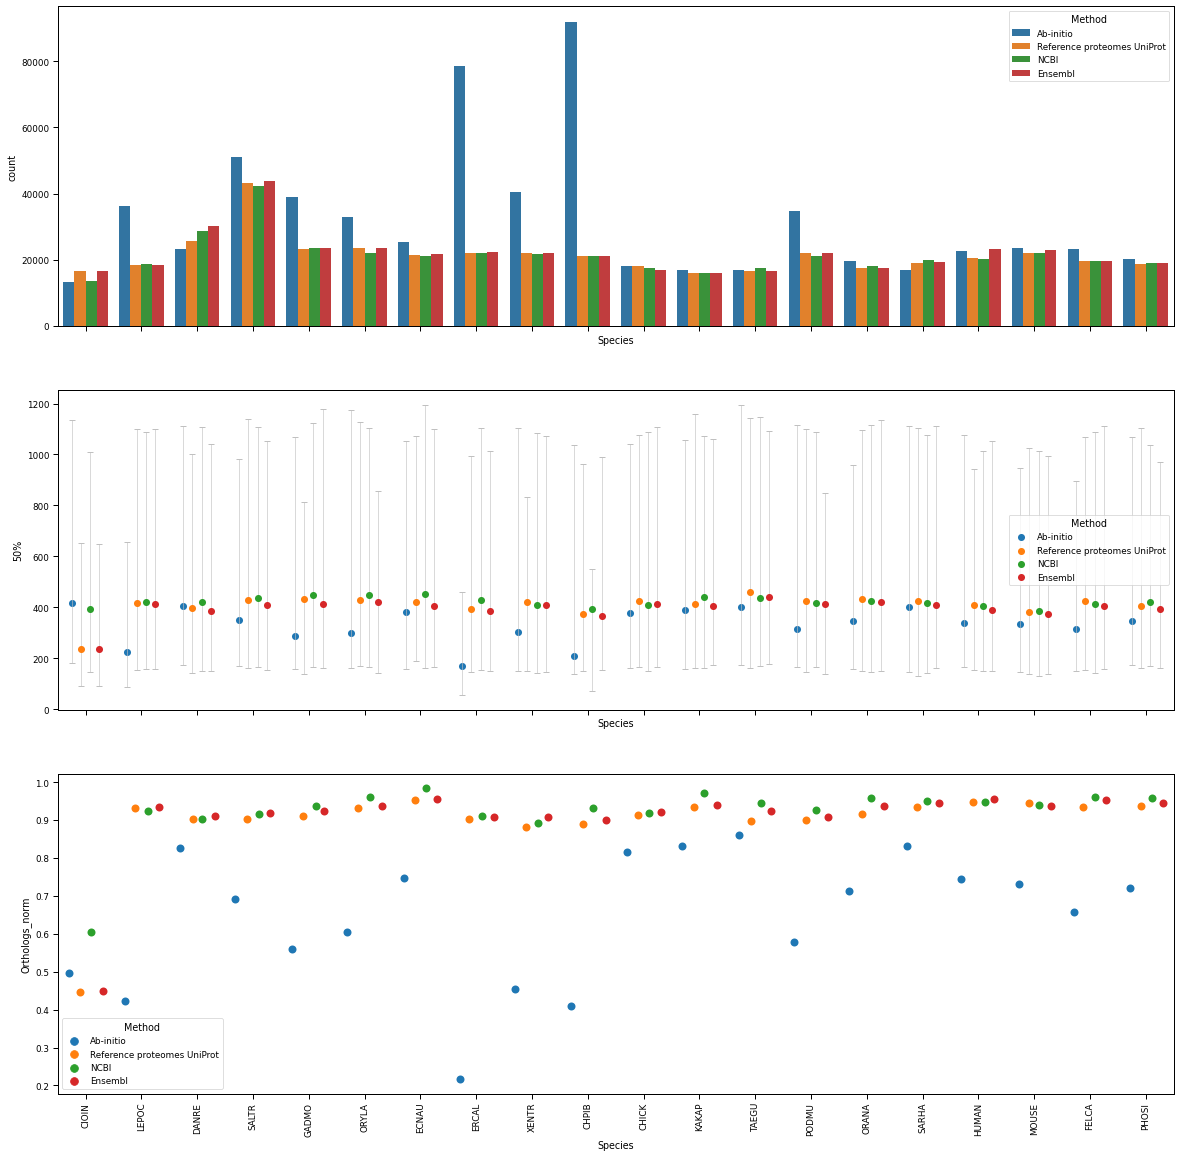

In [39]:
#fig = plt.figure(tight_layout=True)
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(20,20))

fig = sns.stripplot(data=stats2, x='Species', y= 'count', hue='Method', 
                   order=['CIOIN', 'LEPOC', 'DANRE', 'SALTR', 'GADMO', 'ORYLA', 'ECNAU', 'ERCAL', 'XENTR', 'CHPIB', 'CHICK', 'KAKAP', 'TAEGU', 'PODMU', 'ORANA', 'SARHA', 'HUMAN', 'MOUSE', 'FELCA', 'PHOSI'],
                   hue_order=['Ab-initio', 'Reference proteomes UniProt', 'NCBI', 'Ensembl'],
                  dodge=True, size=8, ax=ax1) #palette=



#fig= sns.pointplot(data=stats2, x="Species", y="50%", hue="Method", size=6, join=False, dodge=0.5, ax=ax2, legend=False )

# Calculate the x-coordinates of the error bars
x_pos = np.arange(len(stats2["Species"].unique()))
width = 0.5  # Adjust the width of the error bars as needed #I think the width and dodge (sns.pointplot) have to be the same

#lines = ax2.get_lines()  # Get the lines plotted by pointplot

for i, species in enumerate(stats2["Species"].unique()):
    species_data = stats2[stats2["Species"] == species]
    x_values = x_pos[i] + np.linspace(-width/2, width/2, len(species_data))
    medians = species_data["50%"]
    pos_sems = species_data["75%"]  # Column name for positive SEM
    neg_sems = species_data["25%"]  # Column name for negative SEM
    #color = lines[i].get_color()  # Get the color of the corresponding data
    
    for x, median, pos_sem, neg_sem in zip(x_values, medians, pos_sems, neg_sems):
        ax2.errorbar(x=x, y=median, yerr=[[neg_sem], [pos_sem]], ecolor= 'silver', barsabove=False,
                    elinewidth=0.6, capsize=3, capthick=1)

fig= sns.pointplot(data=stats2, x="Species", y="50%", hue="Method", size=6, join=False, dodge=0.5, ax=ax2, legend=False)

fig = sns.stripplot(data=statsmerge, x='Species', y= 'Orthologs_norm', hue='Method', 
                   order=['CIOIN', 'LEPOC', 'DANRE', 'SALTR', 'GADMO', 'ORYLA', 'ECNAU', 'ERCAL', 'XENTR', 'CHPIB', 'CHICK', 'KAKAP', 'TAEGU', 'PODMU', 'ORANA', 'SARHA', 'HUMAN', 'MOUSE', 'FELCA', 'PHOSI'],
                   hue_order=['Ab-initio', 'Reference proteomes UniProt', 'NCBI', 'Ensembl'],
                  dodge=True, size=8, ax=ax3)


plt.xticks(rotation=90)  # Adjust the rotation angle as needed
plt.show()
#plt.savefig('ThreePlotsdraft.pdf',bbox_inches='tight', dpi=300)

In [4]:
genelength2=pd.read_csv('CanonicalProteinsLength_3_correction.csv')

In [5]:
methodsrename=pd.DataFrame({'Software': ['OMAAugustus20', 'OMARP20', 'OMAprimEnsembl20','OMAtopEnsembl20','OMAprimNCBI20','OMAtopNCBI20'], 
                           'Method':['Ab-initio', 'Reference proteomes UniProt', 'primEnsembl', 'Ensembl','primNCBI', 'NCBI']})
genelength2['Method']= genelength2['Method'].map(methodsrename.set_index('Software')['Method'])

In [6]:
toplot=['Ab-initio', 'Ensembl', 'Reference proteomes UniProt', 'NCBI']
genelength2plot=genelength2.loc[genelength2['Method'].isin(toplot)]

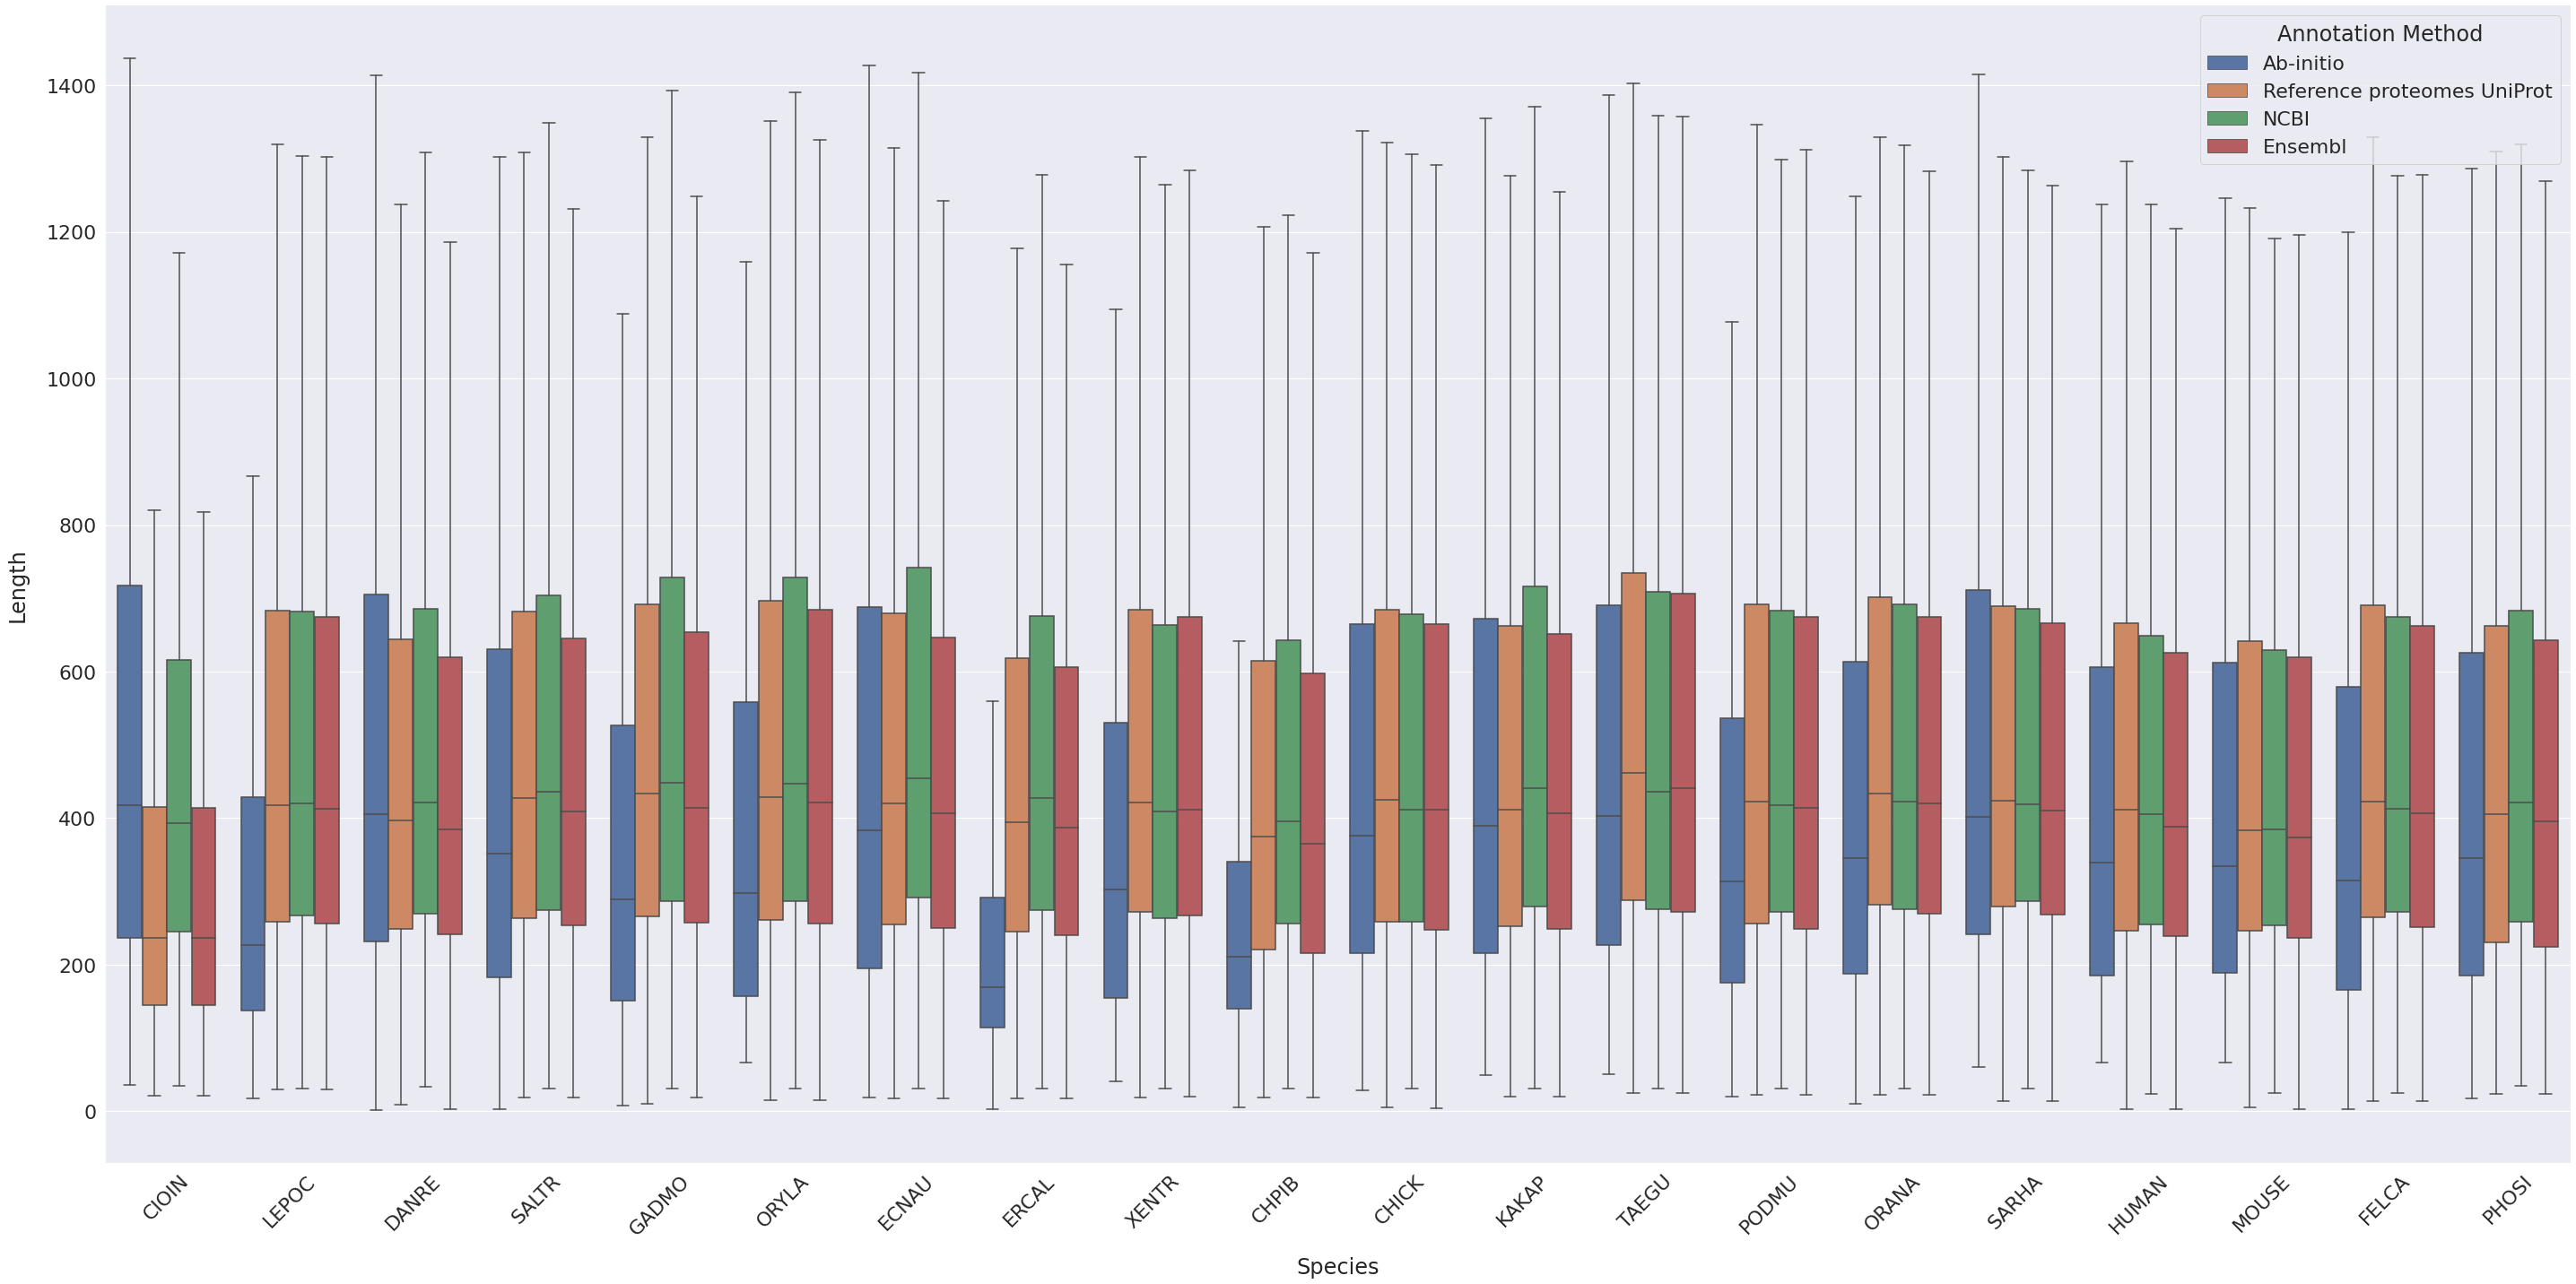

In [10]:
sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=(40,20))
fig = sns.boxplot(data=genelength2plot, x='Species', y='Length', hue= 'Method', showfliers=False)
#ax.set(xlabel='Method', ylabel='Protein length')
ax.yaxis.labelpad = 20
ax.xaxis.labelpad=20
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45)
fig.legend(loc='best', title = 'Annotation Method')
sns.despine()
plt.tight_layout()
plt.show()
#plt.savefig('proteinlengthboxplotspecies.png', dpi=300)

In [79]:
genelength2plot

,Method,Species,Protein,Length
0,Ab-initio,CIOIN,CIOINg1.t1,1425
1,Ab-initio,CIOIN,CIOINg2.t1,408
2,Ab-initio,CIOIN,CIOINg3.t1,1610
3,Ab-initio,CIOIN,CIOINg4.t1,833
4,Ab-initio,CIOIN,CIOINg5.t1,358
...,...,...,...,...
2789807,Ensembl,PHOSI,ENSPSNP00000031555.1,348
2789808,Ensembl,PHOSI,ENSPSNP00000031556.1,1241
2789809,Ensembl,PHOSI,ENSPSNP00000031558.1,557
2789810,Ensembl,PHOSI,ENSPSNP00000031560.1,566


NameError: name 'genelength2plot' is not defined

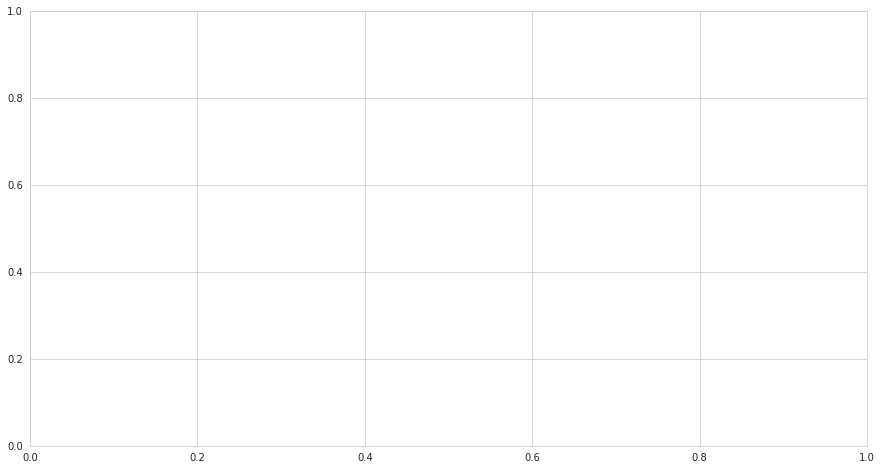

In [22]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(15,8))
fig = plt.boxplot(genelength2plot['Length'], palette="BrBG",
                  order=especies, whis=0, showfliers=False)
#ax.set(xlabel='Method', ylabel='Protein length')
ax.yaxis.labelpad = 20
ax.xaxis.labelpad=20
ax.set_ylim([0,900])
labels = ax.get_xticklabels()
plt.setp(labels, rotation=90)
fig.legend(loc='upper right', title = 'Annotation Method')
sns.set(font_scale=1)
for box in fig['boxes']:
    # change outline color
    box.set(color='#7570b3', linewidth=2)

#plt.setp(fig.lines, color="white")
#fig.legend([],[], frameon=False)
#sns.move_legend(ax,  bbox_to_anchor=(1, 1.3))
sns.despine()
plt.tight_layout()
plt.show()
#plt.savefig('Canonical_proteinlengthboxplot_species_new.png', dpi=300)

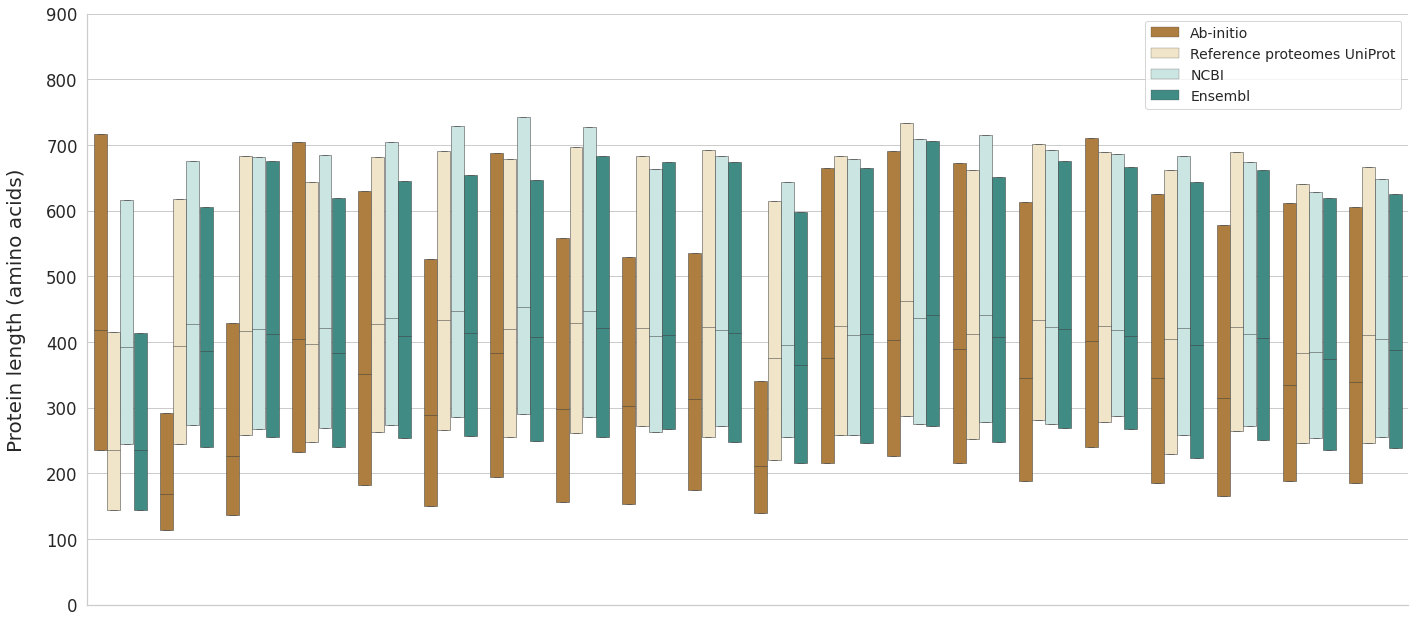

In [122]:
#sns.set_context("notebook")
#sns.set(font_scale=1.5)

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(20,9))
fig = sns.boxplot(data=genelength2plot, x='Species', y='Length', hue= 'Method', palette="BrBG", linewidth=0.5,
                  order=especies, whis=0, showfliers=False)
#ax.set(xlabel='Method', ylabel='Protein length')
ax.yaxis.labelpad = 20
ax.xaxis.labelpad=20
ax.set_ylim([0,900])
labels = ax.get_xticklabels()
#sns.move_legend(fig, "center left", bbox_to_anchor=(1, 0.5))
#frame= plt.legend().get_frame()
#frame.set_facecolor('lightgrey')
plt.legend(fontsize=14)
plt.setp(labels, rotation=90)

ax.set(xlabel=None)

plt.xticks([]) ## Delete species names
ax.set_ylabel('Protein length (amino acids)', labelpad=20, size=20)
#ax1.set(ylabel='Number of genes')

sns.despine()
plt.tight_layout()
#plt.show()
#plt.savefig('Canonical_proteinlengthboxplot_species_new_2.png', dpi=300)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'CIOIN'),
  Text(1, 0, 'LEPOC'),
  Text(2, 0, 'DANRE'),
  Text(3, 0, 'SALTR'),
  Text(4, 0, 'GADMO'),
  Text(5, 0, 'ORYLA'),
  Text(6, 0, 'ECNAU'),
  Text(7, 0, 'ERCAL'),
  Text(8, 0, 'XENTR'),
  Text(9, 0, 'CHPIB'),
  Text(10, 0, 'CHICK'),
  Text(11, 0, 'KAKAP'),
  Text(12, 0, 'TAEGU'),
  Text(13, 0, 'PODMU'),
  Text(14, 0, 'ORANA'),
  Text(15, 0, 'SARHA'),
  Text(16, 0, 'HUMAN'),
  Text(17, 0, 'MOUSE'),
  Text(18, 0, 'FELCA'),
  Text(19, 0, 'PHOSI')])

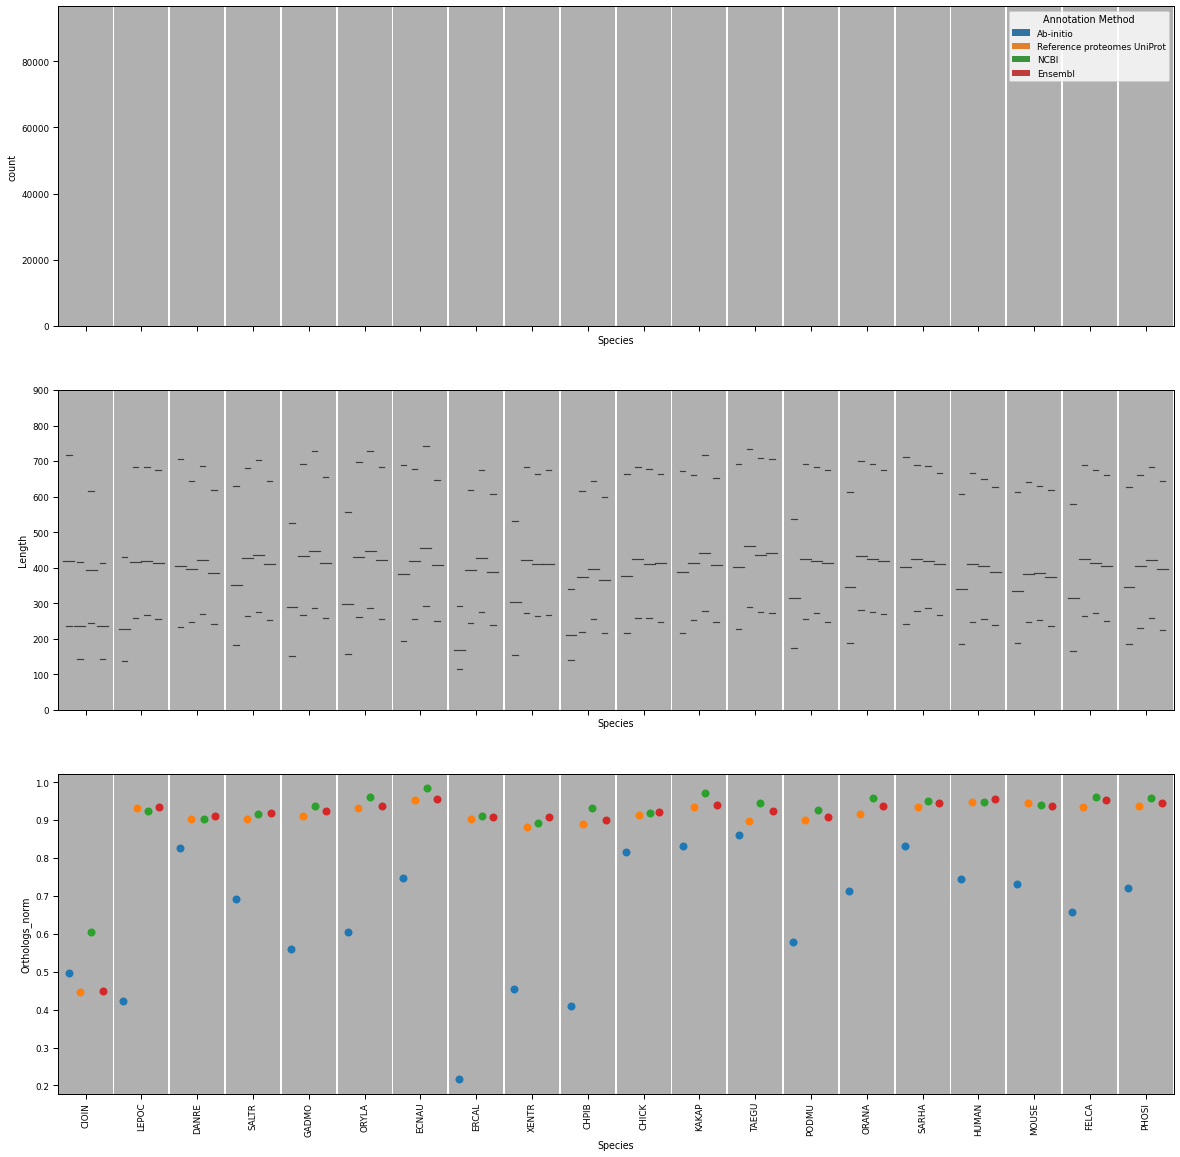

In [37]:
#fig = plt.figure(tight_layout=True)
sns.set_context("paper")
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(20,20))
fig = sns.stripplot(data=stats2, x='Species', y= 'count', hue='Method', 
                   order=['CIOIN', 'LEPOC', 'DANRE', 'SALTR', 'GADMO', 'ORYLA', 'ECNAU', 'ERCAL', 'XENTR', 'CHPIB', 'CHICK', 'KAKAP', 'TAEGU', 'PODMU', 'ORANA', 'SARHA', 'HUMAN', 'MOUSE', 'FELCA', 'PHOSI'],
                   hue_order=['Ab-initio', 'Reference proteomes UniProt', 'NCBI', 'Ensembl'],
                  dodge=True, size=8, ax=ax1) #palette=



#lines = ax2.get_lines()  # Get the lines plotted by pointplot


fig = sns.boxplot(data=genelength2plot, x='Species', y='Length', hue= 'Method', whis=0, showfliers=False, ax=ax2)
ax2.set_ylim([0,900])


fig = sns.stripplot(data=statsmerge, x='Species', y= 'Orthologs_norm', hue='Method', 
                   order=['CIOIN', 'LEPOC', 'DANRE', 'SALTR', 'GADMO', 'ORYLA', 'ECNAU', 'ERCAL', 'XENTR', 'CHPIB', 'CHICK', 'KAKAP', 'TAEGU', 'PODMU', 'ORANA', 'SARHA', 'HUMAN', 'MOUSE', 'FELCA', 'PHOSI'],
                   hue_order=['Ab-initio', 'Reference proteomes UniProt', 'NCBI', 'Ensembl'],
                  dodge=True, size=8, ax=ax3)

#ax1.xaxis.grid(True, linewidth=54)
#ax2.xaxis.grid(True, linewidth=54)
#ax3.xaxis.grid(True, linewidth=54)

ax1.legend(loc='upper right', title = 'Annotation Method')
ax2.get_legend().remove()
ax3.get_legend().remove()
plt.xticks(rotation=90)  # Adjust the rotation angle as needed
#plt.savefig('ThreePlotsdraft2.png',bbox_inches='tight', dpi=300)

## Post-review by Natasha

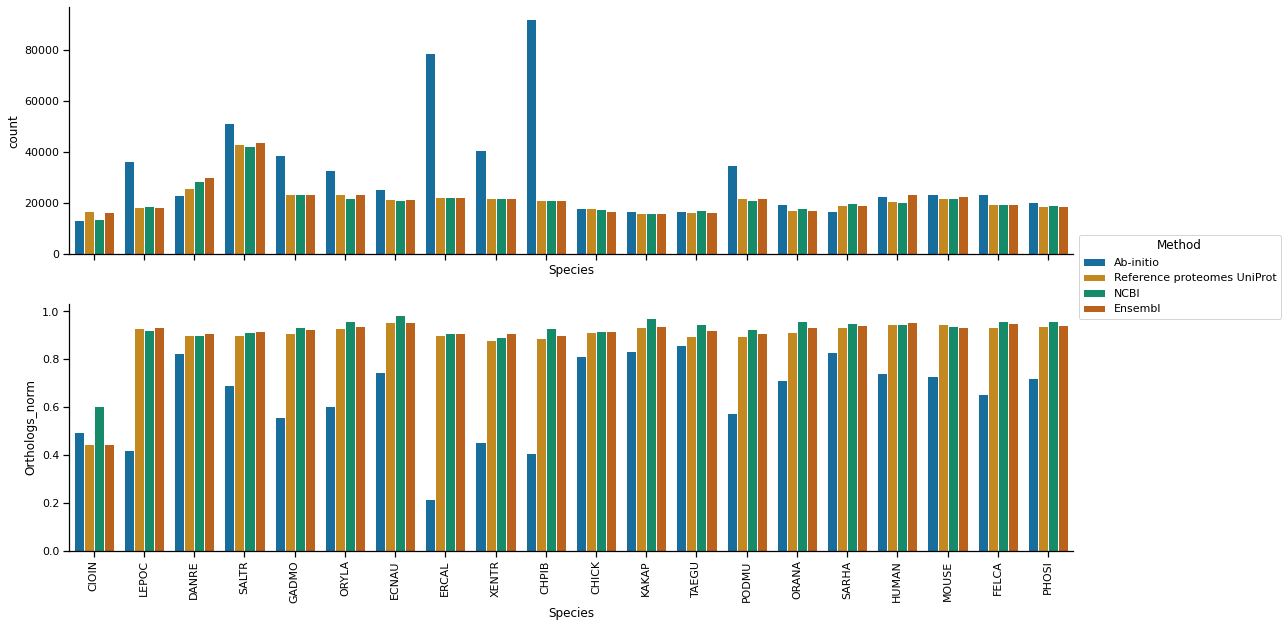

In [71]:
#fig = plt.figure(tight_layout=True)

sns.set_context("notebook")

fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(18,10))

fig = sns.barplot(data=stats2, x='Species', y= 'count', hue='Method', 
                   order=['CIOIN', 'LEPOC', 'DANRE', 'SALTR', 'GADMO', 'ORYLA', 'ECNAU', 'ERCAL', 'XENTR', 'CHPIB', 'CHICK', 'KAKAP', 'TAEGU', 'PODMU', 'ORANA', 'SARHA', 'HUMAN', 'MOUSE', 'FELCA', 'PHOSI'],
                   hue_order=['Ab-initio', 'Reference proteomes UniProt', 'NCBI', 'Ensembl'],
                  ax=ax1, palette="colorblind", edgecolor= 'white') #



#fig= sns.pointplot(data=stats2, x="Species", y="50%", hue="Method", size=6, join=False, dodge=0.5, ax=ax2, legend=False )


fig = sns.barplot(data=statsmerge, x='Species', y= 'Orthologs_norm', hue='Method', 
                   order=['CIOIN', 'LEPOC', 'DANRE', 'SALTR', 'GADMO', 'ORYLA', 'ECNAU', 'ERCAL', 'XENTR', 'CHPIB', 'CHICK', 'KAKAP', 'TAEGU', 'PODMU', 'ORANA', 'SARHA', 'HUMAN', 'MOUSE', 'FELCA', 'PHOSI'],
                   hue_order=['Ab-initio', 'Reference proteomes UniProt', 'NCBI', 'Ensembl'],
                ax=ax2, palette="colorblind", edgecolor='white')

ax1.legend([],[], frameon=False)
sns.move_legend(ax2, "upper left", bbox_to_anchor=(1, 1.3))
sns.despine()

plt.xticks(rotation=90)  # Adjust the rotation angle as needed
plt.show()
#plt.savefig('ThreePlotsdraft.pdf',bbox_inches='tight', dpi=300)

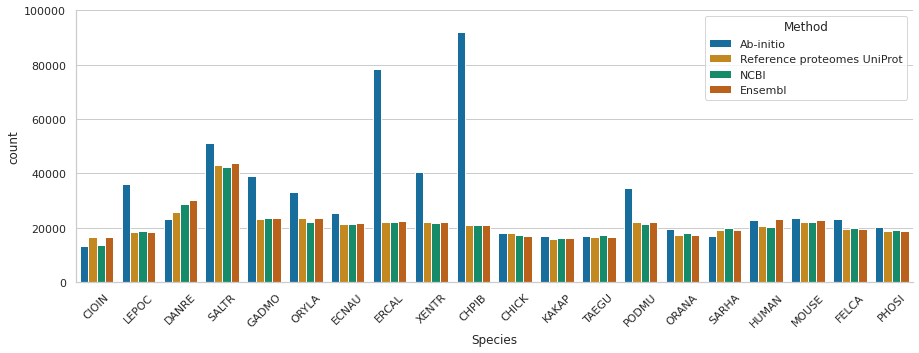

In [6]:
sns.set_context("notebook")
sns.set_style("whitegrid")
fig, ax= plt.subplots(figsize=(15,5))
fig = sns.barplot(data=stats2, x='Species', y= 'count', hue='Method', 
                   order=['CIOIN', 'LEPOC', 'DANRE', 'SALTR', 'GADMO', 'ORYLA', 'ECNAU', 'ERCAL', 'XENTR', 'CHPIB', 'CHICK', 'KAKAP', 'TAEGU', 'PODMU', 'ORANA', 'SARHA', 'HUMAN', 'MOUSE', 'FELCA', 'PHOSI'],
                   hue_order=['Ab-initio', 'Reference proteomes UniProt', 'NCBI', 'Ensembl'],
                 palette="colorblind", edgecolor= 'white')

ax.set_ylim([0,100000])
sns.despine()
plt.xticks(rotation=45)  # Adjust the rotation angle as needed
plt.savefig('Genes_count_barplot.png',bbox_inches='tight', dpi=300)

ValueError: Could not interpret value `count_inverse` for parameter `x`

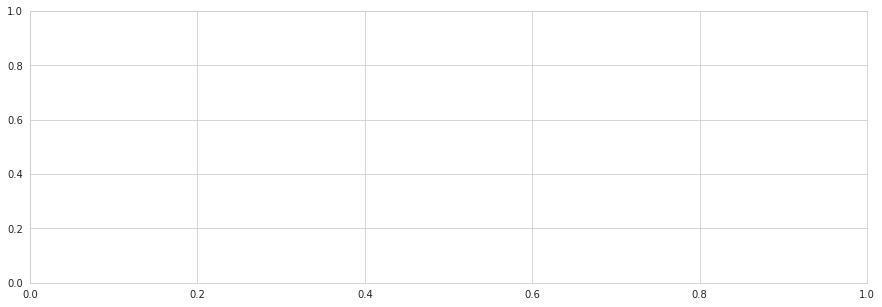

In [8]:
sns.set_style("whitegrid")
fig, ax= plt.subplots(figsize=(15,5))
fig = sns.histplot(data=stats2, x='count_inverse', binwidth=0.000001)

In [8]:
stats2['count_inverse']=(1/stats2['count'])
stats2['count_logten']=np.log10(stats2['count'])

In [29]:
stats2

,Species,Method,count,mean,std,min,25%,50%,75%,max
8,CIOIN,Ab-initio,13196.0,587.237875,667.740078,36.0,236.0,418.0,717.0,33420.0
11,CIOIN,Reference proteomes UniProt,16680.0,322.028777,347.341120,21.0,144.0,236.0,415.0,21338.0
10,CIOIN,NCBI,13627.0,512.347912,520.487474,35.0,245.0,393.0,616.0,26404.0
9,CIOIN,Ensembl,16671.0,321.240957,346.229801,21.0,144.0,236.0,414.0,21338.0
40,LEPOC,Ab-initio,36227.0,360.272283,416.437873,17.0,137.0,226.0,429.0,22541.0
...,...,...,...,...,...,...,...,...,...,...
27,FELCA,Reference proteomes UniProt,19652.0,563.930389,554.057233,13.0,264.0,423.0,690.0,27108.0
59,PHOSI,Reference proteomes UniProt,18892.0,536.783242,509.399713,24.0,230.0,405.0,662.0,8798.0
58,PHOSI,NCBI,19069.0,563.881535,583.314773,35.0,259.0,421.0,683.0,34346.0
57,PHOSI,Ensembl,18962.0,522.826179,495.894731,24.0,224.0,395.0,643.0,8798.0


In [34]:
abab=stats2[stats2['Method']=='NCBI']

In [35]:
proteins_sum = abab['count'].sum()
proteins_sum

426843.0

In [20]:
stats2.groupby(['Method']).describe()

count                                             \
                            count      mean           std      min       25%   
Method                                                                         
Ab-initio                    20.0  32268.90  20717.213252  13196.0  19258.25   
Ensembl                      20.0  21835.65   6217.895102  16037.0  18110.25   
NCBI                         20.0  21342.15   5840.170287  13627.0  18638.00   
Reference proteomes UniProt  20.0  21409.80   5769.453168  16021.0  18268.75   

                                                         mean              \
                                 50%       75%      max count        mean   
Method                                                                      
Ab-initio                    23451.5  36897.50  91991.0  20.0  479.833911   
Ensembl                      21420.5  22999.00  43935.0  20.0  523.065398   
NCBI                         20698.5  21962.25  42405.0  20.0  570.418693   
Reference proteomes UniProt  20881.0  22126.75  43230.0  20.0  541.002647   

                             ...       75%          max            \
                             ...       75%    max count      mean   
Method                       ...                                    
Ab-initio                    ...  676.0000  717.0  20.0  29999.60   
Ensembl                      ...  674.0000  706.0  20.0  10589.15   
NCBI                         ...  705.1875  742.0  20.0  31416.80   
Reference proteomes UniProt  ...  690.3750  734.0  20.0  16136.20   

                                                                       \
                                      std      min       25%      50%   
Method                                                                  
Ab-initio                     7969.296775  16208.0  22403.00  32993.0   
Ensembl                       6065.385381   6598.0   8006.25   8549.5   
NCBI                          5777.055803   9175.0  31501.75  32440.5   
Reference proteomes UniProt  11125.347529   7046.0   8286.75   8799.5   

                                                
                                  75%      max  
Method                                          
Ab-initio                    36350.00  44005.0  
Ensembl                       9657.75  32359.0  
NCBI                         34347.00  37665.0  
Reference proteomes UniProt  27619.00  35213.0  

[4 rows x 64 columns]

In [17]:
statsmerge

,Species,Method,count,mean,std,min,25%,50%,75%,max,Orthologues_total,Relationships_total,Orthologs_norm,Relats_perOrth,Relats_perGene
0,CIOIN,Ab-initio,13196.0,587.237875,667.740078,36.0,236.0,418.0,717.0,33420.0,6547,100538,0.496135,15.356346,7.618824
1,CIOIN,Reference proteomes UniProt,16680.0,322.028777,347.341120,21.0,144.0,236.0,415.0,21338.0,7452,178245,0.446763,23.919082,10.686151
2,CIOIN,NCBI,13627.0,512.347912,520.487474,35.0,245.0,393.0,616.0,26404.0,8254,247412,0.605709,29.974800,18.156014
3,CIOIN,Ensembl,16671.0,321.240957,346.229801,21.0,144.0,236.0,414.0,21338.0,7467,185286,0.447904,24.813982,11.114270
4,LEPOC,Ab-initio,36227.0,360.272283,416.437873,17.0,137.0,226.0,429.0,22541.0,15308,179561,0.422558,11.729880,4.956552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,FELCA,Reference proteomes UniProt,19652.0,563.930389,554.057233,13.0,264.0,423.0,690.0,27108.0,18385,384469,0.935528,20.912102,19.563861
76,PHOSI,Reference proteomes UniProt,18892.0,536.783242,509.399713,24.0,230.0,405.0,662.0,8798.0,17725,299045,0.938228,16.871368,15.829187
77,PHOSI,NCBI,19069.0,563.881535,583.314773,35.0,259.0,421.0,683.0,34346.0,18288,545257,0.959043,29.815015,28.593896
78,PHOSI,Ensembl,18962.0,522.826179,495.894731,24.0,224.0,395.0,643.0,8798.0,17901,322722,0.944046,18.028155,17.019407


In [24]:
pd.set_option('display.max_columns', None)
proportionstats=statsmerge.groupby(['Method'])['Orthologs_norm'].describe()
proportionstats.to_csv('OrthProp_statsbymethod.csv')

In [40]:
from scipy.stats import shapiro, kruskal, bartlett
countdata=stats2['count']

In [10]:
stats2

,Species,Method,count,mean,std,min,25%,50%,75%,max
34,HUMAN,NCBI,20307.0,545.009947,575.477601,24.0,255.00,405.0,648.50,34350.0
18,ECNAU,NCBI,21288.0,614.432074,642.027026,31.0,291.00,454.0,742.00,31060.0
46,MOUSE,NCBI,21926.0,530.448463,547.644307,25.0,254.00,385.0,629.00,33467.0
78,XENTR,NCBI,21826.0,559.763860,582.093613,31.0,263.00,409.0,664.00,33494.0
6,CHPIB,NCBI,21090.0,544.141441,572.674562,31.0,256.00,395.0,643.00,37665.0
2,CHICK,NCBI,17477.0,561.258568,533.220707,31.0,259.00,411.0,678.00,9175.0
54,ORYLA,NCBI,22071.0,605.478229,624.597500,31.0,286.00,447.0,728.00,31552.0
30,GADMO,NCBI,23485.0,603.737492,613.731306,31.0,286.00,448.0,729.00,32081.0
26,FELCA,NCBI,19748.0,565.020762,587.148066,25.0,272.00,413.0,674.00,34733.0
38,KAKAP,NCBI,16060.0,596.877335,611.761899,31.0,279.00,441.0,716.00,31513.0


The tests (Willcoxon) for p-values used in this boxplot are bellow, after the distribution plots

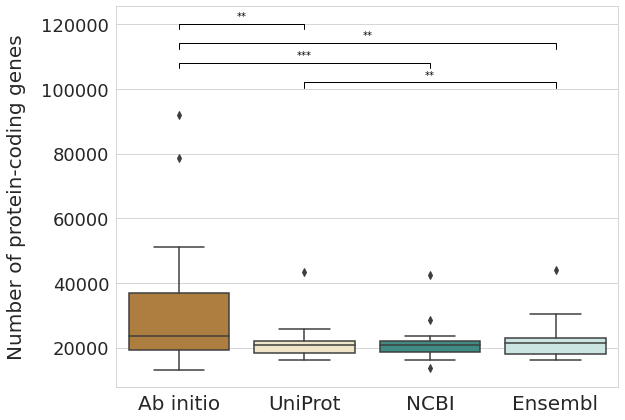

In [31]:
BrBGadapted= ['#BF812D', '#F6E8C3', '#35978F', '#C7EAE5']

sns.set_style("whitegrid")
fig, ax= plt.subplots(figsize=(9,7))
fig = sns.boxplot(data=stats2, x='Method', y='count', palette=BrBGadapted)

# Pre-calculated p-values for pairwise comparisons
p_values = {
    ('Ab-initio', 'Reference proteomes UniProt'): 0.0014,  # Replace with your actual p-values
    ('Ab-initio', 'Ensembl'): 0.0021,
    ('Ab-initio', 'NCBI'): 0.0007,
    ('Reference proteomes UniProt', 'Ensembl'):0.0018
    # Add more pairs and their respective p-values here
}

# Set significance levels
alpha_levels = [0.05, 0.01, 0.001]

# Get the y-axis limits
bottom, top = ax.get_ylim()
y_range = top - bottom

# Significance bars
for i, ((method1, method2), p) in enumerate(p_values.items()):
    # Columns corresponding to the datasets of interest
    x1 = [j for j, method in enumerate(stats2['Method'].unique()) if method == method1][0]
    x2 = [j for j, method in enumerate(stats2['Method'].unique()) if method == method2][0]

    # What level is this bar among the bars above the plot?
    level = len(p_values) - i

    # Plot the bar
    bar_height = (y_range * 0.07 * level) + top
    bar_tips = bar_height - (y_range * 0.02)
    plt.plot(
        [x1, x1, x2, x2],
        [bar_tips, bar_height, bar_height, bar_tips], lw=1, c='k'
    )

    # Significance level
    sig_symbol = ''
    for alpha_level in alpha_levels:
        if p < alpha_level:
            if alpha_level == 0.001:
                sig_symbol = '***'
            elif alpha_level == 0.01:
                sig_symbol = '**'
            elif alpha_level == 0.05:
                sig_symbol = '*'

    text_height = bar_height + (y_range * 0.01)
    plt.text((x1 + x2) * 0.5, text_height, sig_symbol, ha='center', va='bottom', c='k')

    

method_labels = ['Ab initio', 'UniProt', 'NCBI', 'Ensembl']

# Set x-axis tick labels
#ax.set_xticks(range(len(method_labels)))
ax.set_xticklabels(method_labels)

ax.set_ylabel('Number of protein-coding genes', fontsize=20, labelpad=15)
ax.set_xlabel('')
ax.tick_params(axis='y', labelsize=18)
ax.tick_params(axis='x', labelsize=20)
#plt.show()
    
#plt.savefig('GenesNumberBoxplotStat.png',bbox_inches='tight', dpi=300)

## Could additionally do Bartlett;s test whatever...

In [11]:
description=stats2.describe()['count']

In [12]:
description2=stats2.groupby(['Method']).describe()['count']

In [13]:
description2

,count,mean,std,min,25%,50%,75%,max
Method,,,,,,,,
Ab-initio,20.0,32268.90,20717.213252,13196.0,19258.25,23451.5,36897.50,91991.0
Ensembl,20.0,21835.65,6217.895102,16037.0,18110.25,21420.5,22999.00,43935.0
NCBI,20.0,21342.15,5840.170287,13627.0,18638.00,20698.5,21962.25,42405.0
Reference proteomes UniProt,20.0,21409.80,5769.453168,16021.0,18268.75,20881.0,22126.75,43230.0


In [51]:
#description2.to_csv("NumberofGenes_stats.csv")

/users/sprietob/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
<ipython-input-23-8f6240477b5c>:3: UserWarning: The figure layout has changed to tight
  g.fig.tight_layout()


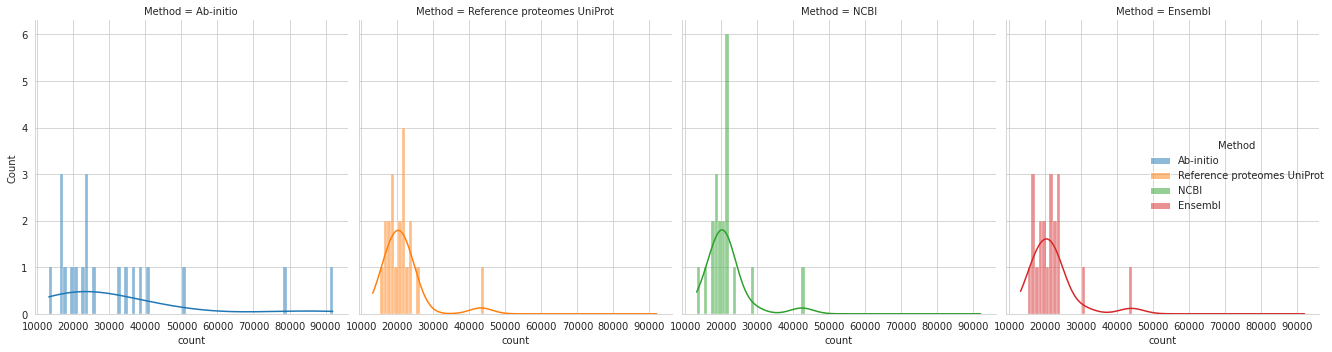

In [23]:
g = sns.displot(data=stats2, x="count", col="Method", hue="Method", col_wrap=4, height=5, kde= True, aspect=0.8, binwidth=1000)

g.fig.tight_layout()

Table for checking normality of difference between groups (paired t-test or willcoxon?)

In [15]:
abin=stats2[stats2["Method"]=='Ab-initio']
refp=stats2[stats2["Method"]=='Reference proteomes UniProt']
ncbi=stats2[stats2["Method"]=='NCBI']
ensembl=stats2[stats2["Method"]=='Ensembl']

abinc=list(abin['count'])
refpc=list(refp['count'])
ncbic=list(ncbi['count'])
ensemblc=list(ensembl['count'])

d = {'Species': abin['Species'], 'Ab-initio': abinc, 'RP-UP': refpc, 'Ensembl': ensemblc, 'NCBI': ncbic}
df= pd.DataFrame(data=d)
df['Ab-RP']= df['Ab-initio']- df['RP-UP']
df['Ab-Ens']= df['Ab-initio'] - df['Ensembl']
df['Ab-NCBI']=df['Ab-initio'] - df['NCBI']
df['RP-Ens']=df['RP-UP'] -df['Ensembl']
df['RP-NCBI']=df['RP-UP']- df['NCBI']
df['Ens-NCBI']=df['Ensembl']- df['NCBI']
df

,Species,Ab-initio,RP-UP,Ensembl,NCBI,Ab-RP,Ab-Ens,Ab-NCBI,RP-Ens,RP-NCBI,Ens-NCBI
8,CIOIN,13196.0,16680.0,16671.0,13627.0,-3484.0,-3475.0,-431.0,9.0,3053.0,3044.0
40,LEPOC,36227.0,18321.0,18341.0,18784.0,17906.0,17886.0,17443.0,-20.0,-463.0,-443.0
12,DANRE,23288.0,25707.0,30313.0,28638.0,-2419.0,-7025.0,-5350.0,-4606.0,-2931.0,1675.0
64,SALTR,51185.0,43230.0,43935.0,42405.0,7955.0,7250.0,8780.0,-705.0,825.0,1530.0
28,GADMO,38909.0,23383.0,23515.0,23485.0,15526.0,15394.0,15424.0,-132.0,-102.0,30.0
52,ORYLA,33024.0,23617.0,23622.0,22071.0,9407.0,9402.0,10953.0,-5.0,1546.0,1551.0
16,ECNAU,25404.0,21548.0,21655.0,21288.0,3856.0,3749.0,4116.0,-107.0,260.0,367.0
20,ERCAL,78579.0,22210.0,22329.0,22180.0,56369.0,56250.0,56399.0,-119.0,30.0,149.0
76,XENTR,40554.0,22099.0,22107.0,21826.0,18455.0,18447.0,18728.0,-8.0,273.0,281.0
4,CHPIB,91991.0,21164.0,21186.0,21090.0,70827.0,70805.0,70901.0,-22.0,74.0,96.0


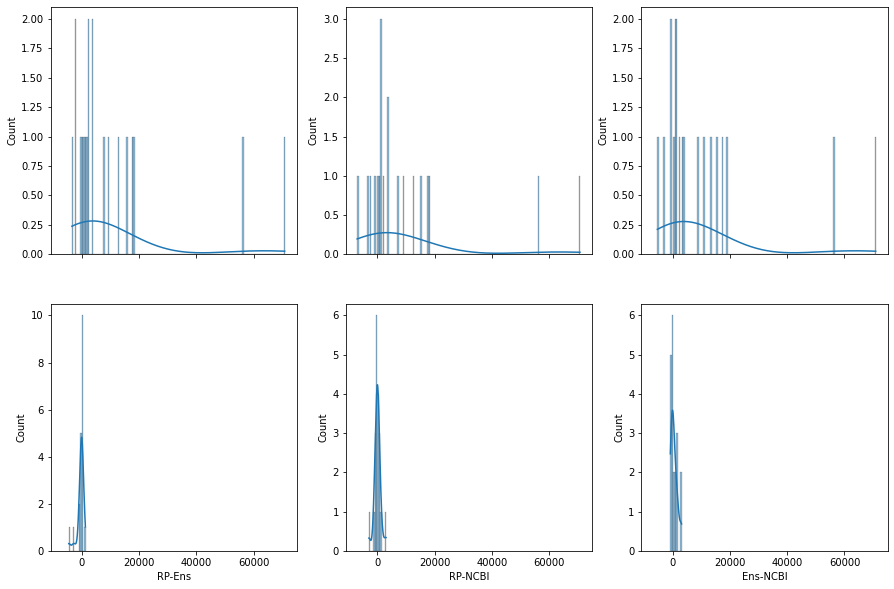

In [33]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6))= plt.subplots(2,3, figsize=(15,10), sharex=True)

fig = sns.histplot(data=df, x='Ab-RP', binwidth=500, kde=True, ax=ax1)
fig = sns.histplot(data=df, x='Ab-Ens', binwidth=500, kde=True, ax=ax2)
fig= sns.histplot(data=df, x='Ab-NCBI', binwidth=500, kde=True, ax=ax3)
fig= sns.histplot(data=df, x='RP-Ens', binwidth=500, kde=True, ax=ax4)
fig= sns.histplot(data=df, x='RP-NCBI', binwidth=500, kde=True, ax=ax5)
fig= sns.histplot(data=df, x='Ens-NCBI', binwidth=500, kde=True, ax=ax6)


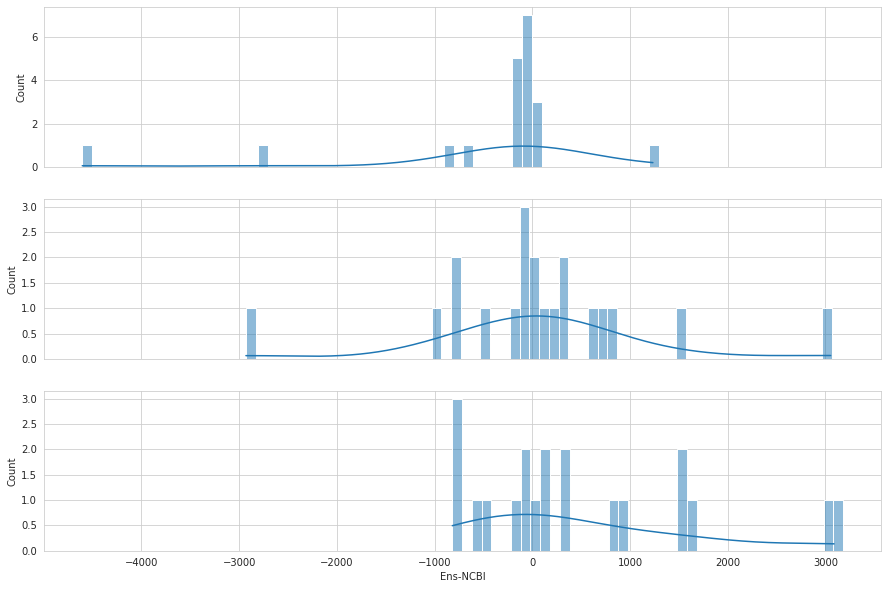

In [15]:
fig, (ax1, ax2, ax3)= plt.subplots(3, figsize=(15,10), sharex=True)

fig= sns.histplot(data=df, x='RP-Ens', binwidth=100, kde=True, ax=ax1)
fig= sns.histplot(data=df, x='RP-NCBI', binwidth=100, kde=True, ax=ax2)
fig= sns.histplot(data=df, x='Ens-NCBI', binwidth=100, kde=True, ax=ax3)


In [43]:
pn1=shapiro(df['Ab-RP'])[1]
pn2=shapiro(df['Ab-Ens'])[1]
pn3=shapiro(df['Ab-NCBI'])[1]
pn4=shapiro(df['RP-Ens'])[1]
pn5=shapiro(df['RP-NCBI'])[1]
pn6=shapiro(df['Ens-NCBI'])[1]

None of the differences are normally distributed. However, let's correct for multiple testing

In [17]:
from scipy import stats

In [53]:
pvalues=[pn1, pn2,pn3,pn4,pn5,pn6]
print(pvalues)

In [54]:
stats.false_discovery_control(pvalues,method='bh')

array([4.00160134e-05, 4.00160134e-05, 4.00160134e-05, 1.72562445e-05,
       3.23984213e-02, 2.27718674e-02])

In [20]:
pv1=stats.wilcoxon(df['Ab-RP'], alternative="greater")[1]
st1=stats.wilcoxon(df['Ab-RP'], alternative="greater")[0]
print(stats.wilcoxon(df['Ab-RP'], alternative="greater"))
pv1

WilcoxonResult(statistic=182.0, pvalue=0.0013561248779296875)


0.0013561248779296875

In [21]:
pv2=stats.wilcoxon(df['Ab-Ens'],alternative="greater")[1]
st2=stats.wilcoxon(df['Ab-Ens'], alternative="greater")[0]
pv2

0.0021104812622070312

In [22]:
pv3=stats.wilcoxon(df['Ab-NCBI'],alternative="greater")[1]
st3=stats.wilcoxon(df['Ab-NCBI'], alternative="greater")[0]
pv3

0.0007162094116210938

In [23]:
pv4=stats.wilcoxon(df['RP-Ens'], alternative="less")[1]
st4=stats.wilcoxon(df['RP-Ens'], alternative="greater")[0]
pv4

0.001827239990234375

In [24]:
pv5=stats.wilcoxon(df['RP-NCBI'], alternative="greater")[1]
st5=stats.wilcoxon(df['RP-NCBI'], alternative="greater")[0]
pv5

0.3780832290649414

In [25]:
pv6=stats.wilcoxon(df['Ens-NCBI'], alternative="greater")[1]
st6=stats.wilcoxon(df['Ens-NCBI'], alternative="greater")[0]
pv6

0.08247852325439453

In [26]:
print(st1,st2,st3,st4,st5,st6)

182.0 179.0 186.0 30.0 114.0 143.0


In [14]:
#bartlett(abinc, refpc, ncbic, ensemblc)

BartlettResult(statistic=52.69721288429694, pvalue=2.1271499215093876e-11)

The p-value (2.1271499215093876e-11) from Bartlett’s test is less than α = .05, which means we can reject the null hypothesis that each group has the same variance. Thus, the assumption of equal variances is violated and we can proceed to perform Welch’s ANOVA.

(https://www.geeksforgeeks.org/how-to-perform-welchs-anova-in-python/)

In [35]:
kruskal(abinc, refpc, ensemblc, ncbic)

KruskalResult(statistic=5.32925925925926, pvalue=0.14921502994148766)

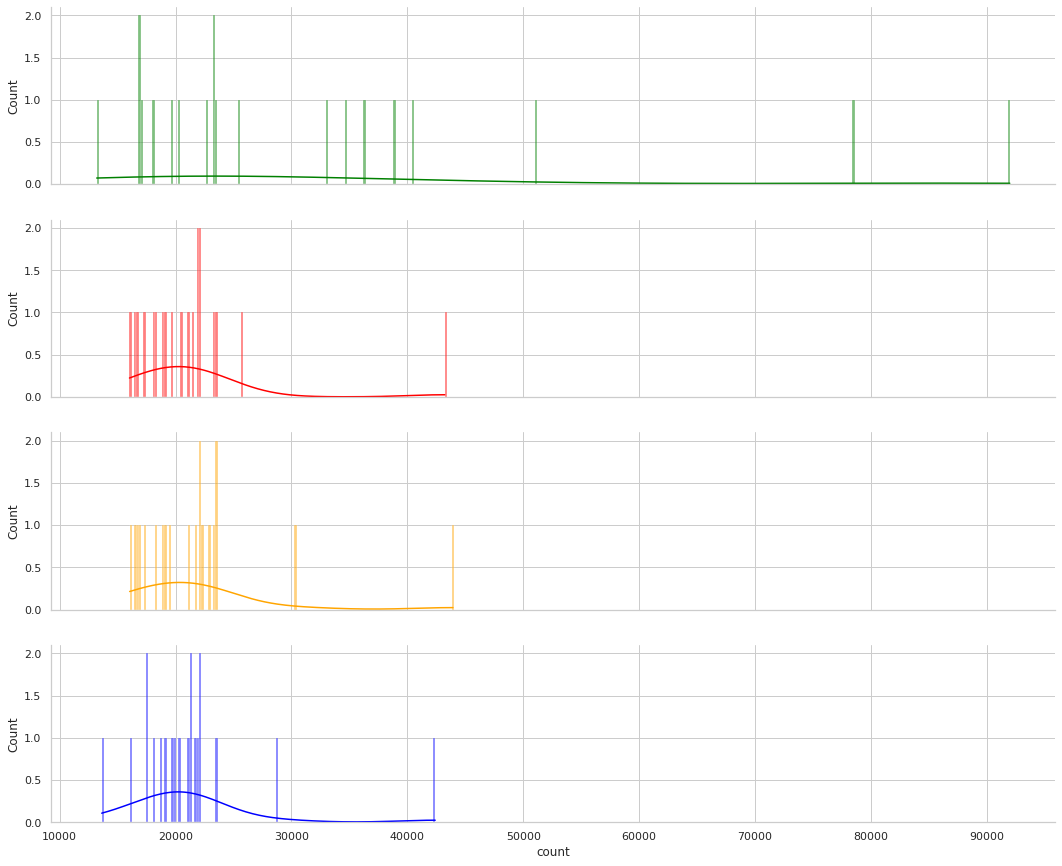

In [67]:
#fig = plt.figure(tight_layout=True)

sns.set_context("notebook")

fig, (ax1, ax2,ax3, ax4) = plt.subplots(4, sharex=True, figsize=(18,15))

fig= sns.histplot(data=abin, x='count', color='green', ax=ax1, binwidth=200, kde=True)
fig= sns.histplot(data=refp, x='count', color='red', ax=ax2, binwidth=200, kde=True)
fig= sns.histplot(data=ensembl, x='count', color='orange', ax=ax3, binwidth=200, kde=True)
fig = sns.histplot(data=ncbi, x='count', color='blue', ax= ax4, binwidth=200, kde=True)


sns.despine()

#plt.xticks(rotation=90)  # Adjust the rotation angle as needed
plt.show()
#plt.savefig('ThreePlotsdraft.pdf',bbox_inches='tight', dpi=300)


In [15]:
#import pingouin as pg

In [29]:
countdata=ncbi['count']
stats.shapiro(countdata)

ShapiroResult(statistic=0.7281660437583923, pvalue=8.776452159509063e-05)

In [83]:
stats2

,Species,Method,count,mean,std,min,25%,50%,75%,max
8,CIOIN,Ab-initio,13196.0,587.237875,667.740078,36.0,236.0,418.0,717.0,33420.0
11,CIOIN,Reference proteomes UniProt,16680.0,322.028777,347.341120,21.0,144.0,236.0,415.0,21338.0
10,CIOIN,NCBI,13627.0,512.347912,520.487474,35.0,245.0,393.0,616.0,26404.0
9,CIOIN,Ensembl,16671.0,321.240957,346.229801,21.0,144.0,236.0,414.0,21338.0
40,LEPOC,Ab-initio,36227.0,360.272283,416.437873,17.0,137.0,226.0,429.0,22541.0
...,...,...,...,...,...,...,...,...,...,...
27,FELCA,Reference proteomes UniProt,19652.0,563.930389,554.057233,13.0,264.0,423.0,690.0,27108.0
59,PHOSI,Reference proteomes UniProt,18892.0,536.783242,509.399713,24.0,230.0,405.0,662.0,8798.0
58,PHOSI,NCBI,19069.0,563.881535,583.314773,35.0,259.0,421.0,683.0,34346.0
57,PHOSI,Ensembl,18962.0,522.826179,495.894731,24.0,224.0,395.0,643.0,8798.0


In [31]:
countdata=abin['count']
stats.shapiro(countdata)

ShapiroResult(statistic=0.762509822845459, pvalue=0.0002510276681277901)

In [74]:
abin=abin[abin['count']<50000]

In [72]:
abin

,Species,Method,count,mean,std,min,25%,50%,75%,max
8,CIOIN,Ab-initio,13196.0,587.237875,667.740078,36.0,236.00,418.0,717.0,33420.0
40,LEPOC,Ab-initio,36227.0,360.272283,416.437873,17.0,137.00,226.0,429.0,22541.0
12,DANRE,Ab-initio,23288.0,572.593653,656.834187,1.0,232.00,405.0,705.0,44005.0
64,SALTR,Ab-initio,51185.0,508.474553,560.288128,2.0,182.00,351.0,630.0,29370.0
28,GADMO,Ab-initio,38909.0,425.787093,474.394888,7.0,151.00,289.0,526.0,21989.0
52,ORYLA,Ab-initio,33024.0,453.040728,544.681967,66.0,157.00,298.0,558.0,33977.0
16,ECNAU,Ab-initio,25404.0,549.279523,601.809214,19.0,194.75,383.0,688.0,23170.0
76,XENTR,Ab-initio,40554.0,442.507052,542.063947,41.0,154.00,303.0,530.0,35366.0
0,CHICK,Ab-initio,18050.0,540.498837,611.956700,28.0,216.00,376.0,665.0,37618.0
36,KAKAP,Ab-initio,17022.0,551.134121,608.594017,49.0,216.00,389.0,672.0,32566.0


### Difference between annotation groups. Welch anova

In [60]:
stats2.pivot(index='Species', columns='Method', values='count')

Method,Ab-initio,Ensembl,NCBI,Reference proteomes UniProt
Species,,,,
CIOIN,13196.0,16671.0,13627.0,16680.0
LEPOC,36227.0,18341.0,18784.0,18321.0
DANRE,23288.0,30313.0,28638.0,25707.0
SALTR,51185.0,43935.0,42405.0,43230.0
GADMO,38909.0,23515.0,23485.0,23383.0
ORYLA,33024.0,23622.0,22071.0,23617.0
ECNAU,25404.0,21655.0,21288.0,21548.0
ERCAL,78579.0,22329.0,22180.0,22210.0
XENTR,40554.0,22107.0,21826.0,22099.0


In [54]:
pg.welch_anova(dv='count', between='Method', data=stats2)

,Source,ddof1,ddof2,F,p-unc,np2
0,Method,3,40.986482,1.718139,0.178264,0.145593


### Orthologs numbers

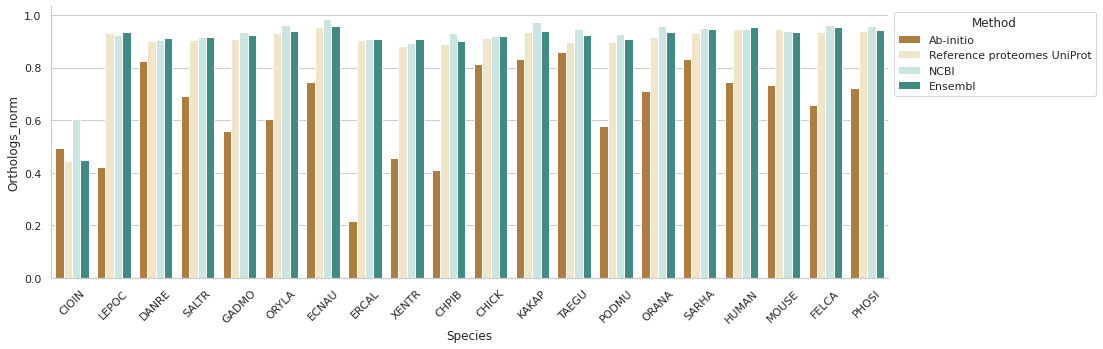

In [17]:
sns.set_context("notebook")
sns.set_style("whitegrid")
fig, ax= plt.subplots(figsize=(15,5))
fig = sns.barplot(data=statsmerge, x='Species', y= 'Orthologs_norm', hue='Method', 
                   order=['CIOIN', 'LEPOC', 'DANRE', 'SALTR', 'GADMO', 'ORYLA', 'ECNAU', 'ERCAL', 'XENTR', 'CHPIB', 'CHICK', 'KAKAP', 'TAEGU', 'PODMU', 'ORANA', 'SARHA', 'HUMAN', 'MOUSE', 'FELCA', 'PHOSI'],
                   hue_order=['Ab-initio', 'Reference proteomes UniProt', 'NCBI', 'Ensembl'],
                 palette="BrBG", edgecolor='white')

sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
sns.despine()
plt.xticks(rotation=45)  # Adjust the rotation angle as needed
plt.savefig('Orthologs_norm_barplot.png',bbox_inches='tight', dpi=300)

In [27]:
abin=statsmerge[statsmerge["Method"]=='Ab-initio']
refp=statsmerge[statsmerge["Method"]=='Reference proteomes UniProt']
ncbi=statsmerge[statsmerge["Method"]=='NCBI']
ensembl=statsmerge[statsmerge["Method"]=='Ensembl']
abin

,Species,Method,count,mean,std,min,25%,50%,75%,max,Orthologues_total,Relationships_total,Orthologs_norm,Relats_perOrth,Relats_perGene
0,CIOIN,Ab-initio,13196.0,587.237875,667.740078,36.0,236.00,418.0,717.0,33420.0,6547,100538,0.496135,15.356346,7.618824
4,LEPOC,Ab-initio,36227.0,360.272283,416.437873,17.0,137.00,226.0,429.0,22541.0,15308,179561,0.422558,11.729880,4.956552
8,DANRE,Ab-initio,23288.0,572.593653,656.834187,1.0,232.00,405.0,705.0,44005.0,19222,308132,0.825404,16.030174,13.231364
12,SALTR,Ab-initio,51185.0,508.474553,560.288128,2.0,182.00,351.0,630.0,29370.0,35429,463848,0.692175,13.092325,9.062186
17,GADMO,Ab-initio,38909.0,425.787093,474.394888,7.0,151.00,289.0,526.0,21989.0,21783,298865,0.559845,13.720103,7.681128
23,ORYLA,Ab-initio,33024.0,453.040728,544.681967,66.0,157.00,298.0,558.0,33977.0,19967,260107,0.604621,13.026844,7.876302
25,ECNAU,Ab-initio,25404.0,549.279523,601.809214,19.0,194.75,383.0,688.0,23170.0,18970,267270,0.746733,14.089088,10.520784
28,ERCAL,Ab-initio,78579.0,249.338347,257.867127,3.0,114.00,169.0,292.0,16208.0,17056,340778,0.217055,19.979948,4.336757
33,XENTR,Ab-initio,40554.0,442.507052,542.063947,41.0,154.00,303.0,530.0,35366.0,18439,367643,0.454678,19.938337,9.065518
38,CHPIB,Ab-initio,91991.0,293.629268,297.042868,5.0,140.00,211.0,341.0,21620.0,37691,547473,0.409725,14.525298,5.951376


In [28]:
abin=statsmerge[statsmerge["Method"]=='Ab-initio']
refp=statsmerge[statsmerge["Method"]=='Reference proteomes UniProt']
ncbi=statsmerge[statsmerge["Method"]=='NCBI']
ensembl=statsmerge[statsmerge["Method"]=='Ensembl']

abinc=list(abin['Orthologs_norm'])
refpc=list(refp['Orthologs_norm'])
ncbic=list(ncbi['Orthologs_norm'])
ensemblc=list(ensembl['Orthologs_norm'])

d = {'Species': abin['Species'], 'Ab-initio': abinc, 'RP-UP': refpc, 'Ensembl': ensemblc, 'NCBI': ncbic}
df= pd.DataFrame(data=d)
df['Ab-RP']= df['Ab-initio']- df['RP-UP']
df['Ab-Ens']= df['Ab-initio'] - df['Ensembl']
df['Ab-NCBI']=df['Ab-initio'] - df['NCBI']
df['RP-Ens']=df['RP-UP'] -df['Ensembl']
df['RP-NCBI']=df['RP-UP']- df['NCBI']
df['Ens-NCBI']=df['Ensembl']- df['NCBI']
df

,Species,Ab-initio,RP-UP,Ensembl,NCBI,Ab-RP,Ab-Ens,Ab-NCBI,RP-Ens,RP-NCBI,Ens-NCBI
0,CIOIN,0.496135,0.446763,0.447904,0.605709,0.049373,0.048232,-0.109574,-0.001141,-0.158947,-0.157806
4,LEPOC,0.422558,0.932154,0.933755,0.922807,-0.509597,-0.511197,-0.500249,-0.001601,0.009348,0.010948
8,DANRE,0.825404,0.902711,0.910896,0.903520,-0.077308,-0.085493,-0.078116,-0.008185,-0.000808,0.007377
12,SALTR,0.692175,0.903609,0.917537,0.914963,-0.211433,-0.225362,-0.222787,-0.013929,-0.011354,0.002574
17,GADMO,0.559845,0.910405,0.925112,0.936981,-0.350560,-0.365267,-0.377136,-0.014707,-0.026576,-0.011869
23,ORYLA,0.604621,0.930601,0.938024,0.960401,-0.325980,-0.333403,-0.355780,-0.007423,-0.029800,-0.022377
25,ECNAU,0.746733,0.954010,0.956407,0.983747,-0.207277,-0.209674,-0.237014,-0.002398,-0.029737,-0.027339
28,ERCAL,0.217055,0.903422,0.908729,0.909739,-0.686366,-0.691673,-0.692683,-0.005307,-0.006317,-0.001010
33,XENTR,0.454678,0.882031,0.908898,0.893247,-0.427353,-0.454220,-0.438569,-0.026867,-0.011216,0.015651
38,CHPIB,0.409725,0.890096,0.900642,0.932954,-0.480372,-0.490917,-0.523229,-0.010546,-0.042858,-0.032312


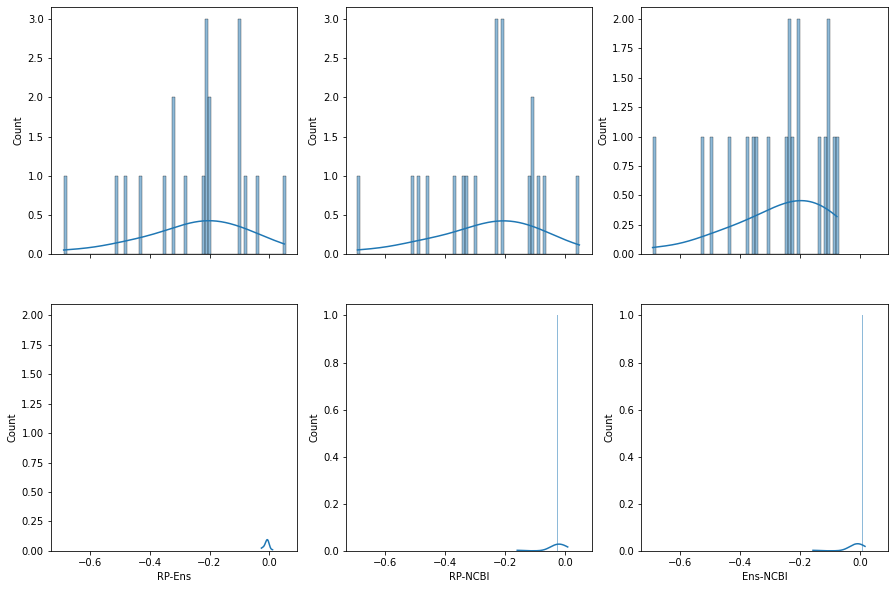

In [23]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6))= plt.subplots(2,3, figsize=(15,10), sharex=True)

fig = sns.histplot(data=df, x='Ab-RP', binwidth=0.01, kde=True, ax=ax1)
fig = sns.histplot(data=df, x='Ab-Ens', binwidth=0.01, kde=True, ax=ax2)
fig= sns.histplot(data=df, x='Ab-NCBI', binwidth=0.01, kde=True, ax=ax3)
fig= sns.histplot(data=df, x='RP-Ens', binwidth=0.01, kde=True, ax=ax4)
fig= sns.histplot(data=df, x='RP-NCBI', binwidth=0.01, kde=True, ax=ax5)
fig= sns.histplot(data=df, x='Ens-NCBI', binwidth=0.01, kde=True, ax=ax6)


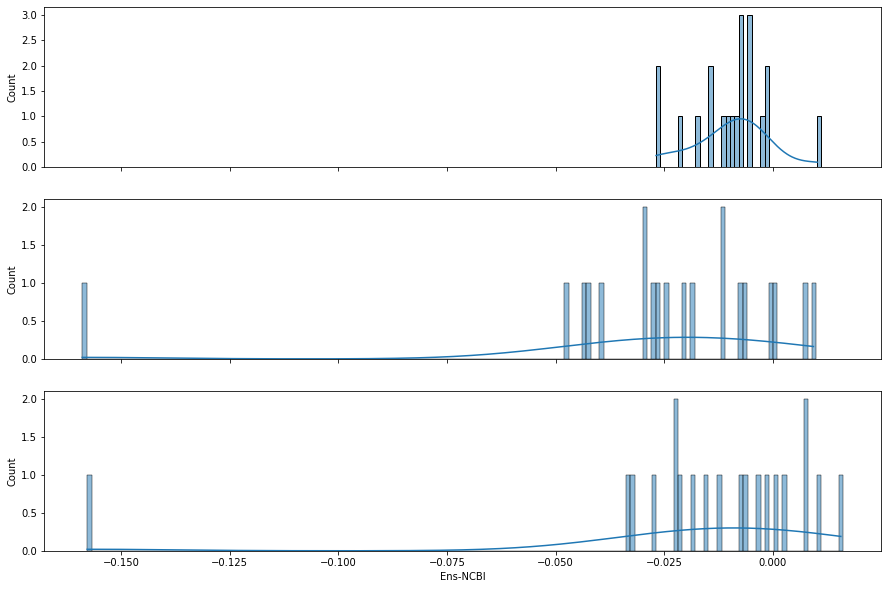

In [25]:
fig, (ax1, ax2, ax3)= plt.subplots(3, figsize=(15,10), sharex=True)

fig= sns.histplot(data=df, x='RP-Ens', binwidth=0.001, kde=True, ax=ax1)
fig= sns.histplot(data=df, x='RP-NCBI', binwidth=0.001, kde=True, ax=ax2)
fig= sns.histplot(data=df, x='Ens-NCBI', binwidth=0.001, kde=True, ax=ax3)

In [26]:
from scipy import stats
pn1=stats.shapiro(df['Ab-RP'])[1]
pn2=stats.shapiro(df['Ab-Ens'])[1]
pn3=stats.shapiro(df['Ab-NCBI'])[1]
pn4=stats.shapiro(df['RP-Ens'])[1]
pn5=stats.shapiro(df['RP-NCBI'])[1]
pn6=stats.shapiro(df['Ens-NCBI'])[1]
pvalues=[pn1, pn2,pn3,pn4,pn5,pn6]

print(pvalues)

[0.4919590353965759, 0.5041908025741577, 0.10526999831199646, 0.42551031708717346, 3.77934193238616e-05, 5.169707037566695e-06]


In [29]:
pv1=stats.wilcoxon(df['Ab-RP'], alternative= "less")[1]
pv2=stats.wilcoxon(df['Ab-Ens'], alternative="less")[1]
pv3=stats.wilcoxon(df['Ab-NCBI'], alternative="less")[1]
pv4=stats.wilcoxon(df['RP-Ens'], alternative="less")[1]
pv5=stats.wilcoxon(df['RP-NCBI'], alternative="less")[1]
pv6=stats.wilcoxon(df['Ens-NCBI'], alternative="less")[1]

st1=stats.wilcoxon(df['Ab-RP'], alternative="less")[0]
st2=stats.wilcoxon(df['Ab-Ens'], alternative="less")[0]
st3=stats.wilcoxon(df['Ab-NCBI'], alternative="less")[0]
st4=stats.wilcoxon(df['RP-Ens'], alternative="less")[0]
st5=stats.wilcoxon(df['RP-NCBI'], alternative="less")[0]
st6=stats.wilcoxon(df['Ens-NCBI'], alternative="less")[0]

pvals=[pv1, pv2,pv3,pv4,pv5,pv6]
sts=[st1,st2,st3,st4,st5,st6]
print(pvals)
print(sts)

[2.86102294921875e-06, 1.9073486328125e-06, 9.5367431640625e-07, 6.67572021484375e-05, 6.67572021484375e-05, 0.006808280944824219]
[2.0, 1.0, 0.0, 12.0, 12.0, 40.0]


These bellow were just a try

In [15]:
NCBIoverEnsembl=[]
NCBIoverUP=[]
corrsp=[]

for sp in species:

    dft=statsmerge.loc[(statsmerge['Species'] == sp) & (statsmerge['Method'] == 'NCBI')]
    NCBIval=dft['Orthologs_norm'].values[0]
    dft=statsmerge.loc[(statsmerge['Species'] == sp) & (statsmerge['Method'] == 'Ensembl')]
    Ensemblval=dft['Orthologs_norm'].values[0]
    dft=statsmerge.loc[(statsmerge['Species'] == sp) & (statsmerge['Method'] == 'Reference proteomes UniProt')]
    UPval=dft['Orthologs_norm'].values[0]
    
    NoE=NCBIval-Ensemblval
    NoU=NCBIval-UPval
    
    corrsp.append(sp)
    NCBIoverEnsembl.append(NoE)
    NCBIoverUP.append(NoU)
        
NCBIdiff=pd.DataFrame({'Species': corrsp, 'NCBI over Ensembl': NCBIoverEnsembl, 'NCBI over UP': NCBIoverUP})

In [16]:
statsmerge

,Species,Method,count,mean,std,min,25%,50%,75%,max,Orthologues_total,Relationships_total,Orthologs_norm,Relats_perOrth,Relats_perGene
0,CIOIN,Ab-initio,13196.0,587.237875,667.740078,36.0,236.0,418.0,717.0,33420.0,6547,100538,0.496135,15.356346,7.618824
1,CIOIN,Reference proteomes UniProt,16680.0,322.028777,347.341120,21.0,144.0,236.0,415.0,21338.0,7452,178245,0.446763,23.919082,10.686151
2,CIOIN,NCBI,13627.0,512.347912,520.487474,35.0,245.0,393.0,616.0,26404.0,8254,247412,0.605709,29.974800,18.156014
3,CIOIN,Ensembl,16671.0,321.240957,346.229801,21.0,144.0,236.0,414.0,21338.0,7467,185286,0.447904,24.813982,11.114270
4,LEPOC,Ab-initio,36227.0,360.272283,416.437873,17.0,137.0,226.0,429.0,22541.0,15308,179561,0.422558,11.729880,4.956552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,FELCA,Reference proteomes UniProt,19652.0,563.930389,554.057233,13.0,264.0,423.0,690.0,27108.0,18385,384469,0.935528,20.912102,19.563861
76,PHOSI,Reference proteomes UniProt,18892.0,536.783242,509.399713,24.0,230.0,405.0,662.0,8798.0,17725,299045,0.938228,16.871368,15.829187
77,PHOSI,NCBI,19069.0,563.881535,583.314773,35.0,259.0,421.0,683.0,34346.0,18288,545257,0.959043,29.815015,28.593896
78,PHOSI,Ensembl,18962.0,522.826179,495.894731,24.0,224.0,395.0,643.0,8798.0,17901,322722,0.944046,18.028155,17.019407


In [32]:
dft=statsmerge.loc[(statsmerge['Species'] == 'CIOIN') & (statsmerge['Method'] == 'NCBI')]
val=dft['Orthologs_norm'].values[0]
print(val)

0.6057092536875321


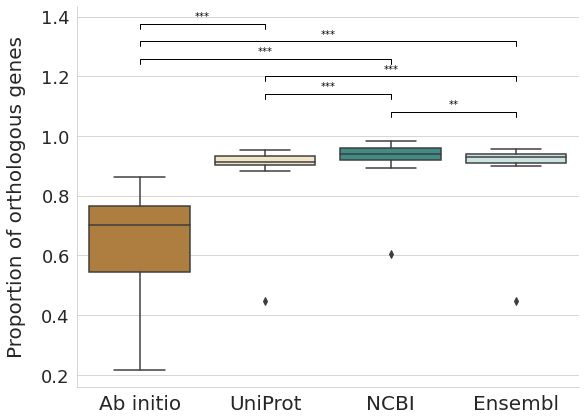

In [36]:
BrBGadapted= ['#BF812D', '#F6E8C3', '#35978F', '#C7EAE5']

sns.set_style("whitegrid")
fig, ax= plt.subplots(figsize=(9,7))
fig = sns.boxplot(data=statsmerge, x='Method', y='Orthologs_norm', palette=BrBGadapted)

# Pre-calculated p-values for pairwise comparisons
p_values = {
    ('Ab-initio', 'Reference proteomes UniProt'): 0.000,  # Replace with your actual p-values
    ('Ab-initio', 'Ensembl'): 0.000,
    ('Ab-initio', 'NCBI'): 0.000,
    ('Reference proteomes UniProt', 'Ensembl'):0.000,
    ('Reference proteomes UniProt', 'NCBI'): 0.000,
    ('Ensembl', 'NCBI'): 0.007
    
    # Add more pairs and their respective p-values here
}

# Set significance levels
alpha_levels = [0.05, 0.01, 0.001]

# Get the y-axis limits
bottom, top = ax.get_ylim()
y_range = top - bottom

# Significance bars
for i, ((method1, method2), p) in enumerate(p_values.items()):
    # Columns corresponding to the datasets of interest
    x1 = [j for j, method in enumerate(stats2['Method'].unique()) if method == method1][0]
    x2 = [j for j, method in enumerate(stats2['Method'].unique()) if method == method2][0]

    # What level is this bar among the bars above the plot?
    level = len(p_values) - i

    # Plot the bar
    bar_height = (y_range * 0.07 * level) + top
    bar_tips = bar_height - (y_range * 0.02)
    plt.plot(
        [x1, x1, x2, x2],
        [bar_tips, bar_height, bar_height, bar_tips], lw=1, c='k'
    )

    # Significance level
    sig_symbol = ''
    for alpha_level in alpha_levels:
        if p < alpha_level:
            if alpha_level == 0.001:
                sig_symbol = '***'
            elif alpha_level == 0.01:
                sig_symbol = '**'
            elif alpha_level == 0.05:
                sig_symbol = '*'

    text_height = bar_height + (y_range * 0.01)
    plt.text((x1 + x2) * 0.5, text_height, sig_symbol, ha='center', va='bottom', c='k')


method_labels = ['Ab initio', 'UniProt', 'NCBI', 'Ensembl']

# Set x-axis tick labels
ax.set_xticklabels(method_labels)

ax.set_ylabel('Proportion of orthologous genes', fontsize=20, labelpad=15)
ax.set_xlabel('')
ax.tick_params(axis='y', labelsize=18)
ax.tick_params(axis='x', labelsize=20)
#plt.show()

sns.despine()
#plt.savefig('Orthologs_byMethod_stats.png',bbox_inches='tight', dpi=300)
#plt.show()
    

In [54]:
import statistics
from scipy import stats

def pos(lst):
    return [x for x in lst if x > 0] or None
def neg(lst):
    return[x for x in lst if x<0] or None

positivediff= statistics.mean(pos(list(NCBIdiff['NCBI over Ensembl'])+ list(NCBIdiff['NCBI over UP'])))
positivediffsem=stats.sem(pos(list(NCBIdiff['NCBI over Ensembl'])+ list(NCBIdiff['NCBI over UP'])))
negativediff= statistics.mean(neg(list(NCBIdiff['NCBI over Ensembl'])+ list(NCBIdiff['NCBI over UP'])))
negativediffsem=stats.sem(neg(list(NCBIdiff['NCBI over Ensembl'])+ list(NCBIdiff['NCBI over UP'])))

print(positivediff)
print(positivediffsem)

print(negativediff)
print(negativediffsem)

0.029789242645473238
0.006574533504614605
-0.006885884017786287
0.0016748204423209236


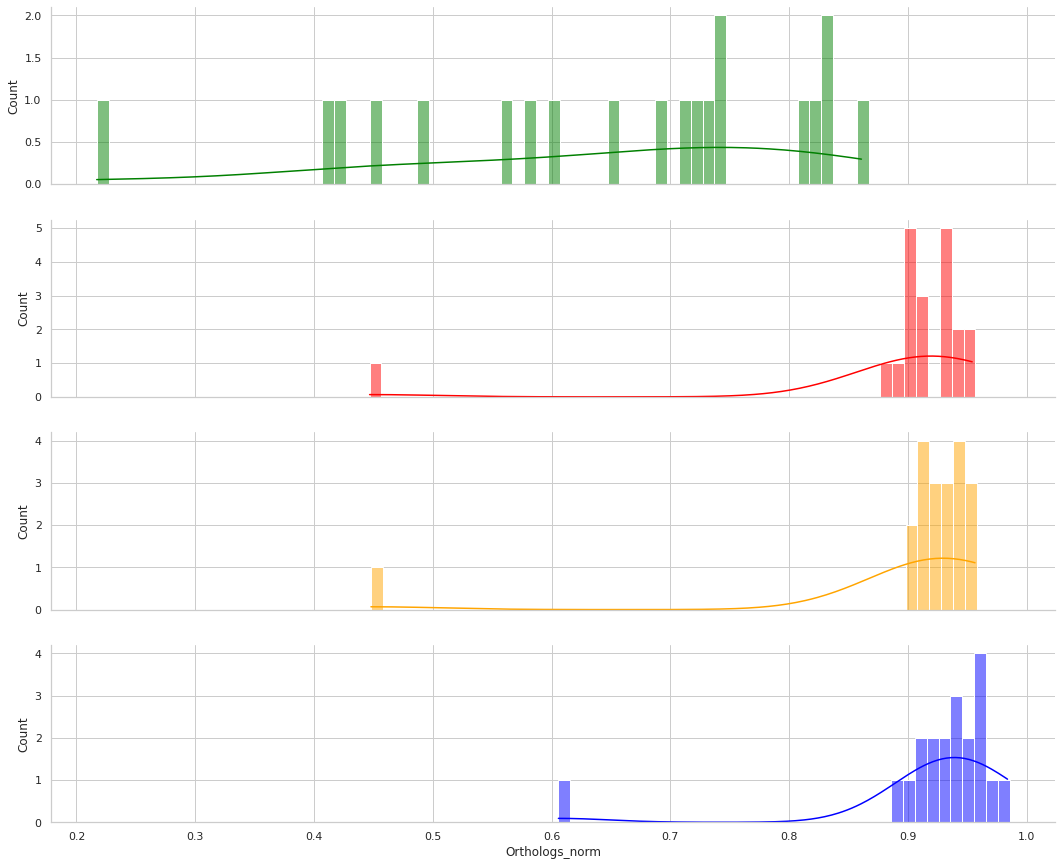

In [19]:
#fig = plt.figure(tight_layout=True)

sns.set_context("notebook")

fig, (ax1, ax2,ax3, ax4) = plt.subplots(4, sharex=True, figsize=(18,15))

fig= sns.histplot(data=abin, x='Orthologs_norm', color='green', binwidth=0.01, ax=ax1,kde=True)
fig= sns.histplot(data=refp, x='Orthologs_norm', color='red',binwidth=0.01, ax=ax2, kde=True)
fig= sns.histplot(data=ensembl, x='Orthologs_norm', color='orange',binwidth=0.01, ax=ax3, kde=True)
fig = sns.histplot(data=ncbi, x='Orthologs_norm', color='blue', binwidth=0.01,ax= ax4, kde=True)


sns.despine()

#plt.xticks(rotation=90)  # Adjust the rotation angle as needed
plt.show()
#plt.savefig('ThreePlotsdraft.pdf',bbox_inches='tight', dpi=300)

In [1]:
description3=statsmerge.groupby(['Method']).describe()['Orthologues_total']

NameError: name 'statsmerge' is not defined

In [56]:
description3

,count,mean,std,min,25%,50%,75%,max
Method,,,,,,,,
Ab-initio,20.0,18297.80,7048.106223,6547.0,14560.75,16994.5,19408.25,37691.0
Ensembl,20.0,19867.35,6245.523578,7467.0,16925.00,19555.5,21486.25,40312.0
NCBI,20.0,19755.40,5610.432833,8254.0,17422.50,19356.5,20670.50,38799.0
Reference proteomes UniProt,20.0,19262.20,5760.695788,7452.0,16940.50,19165.0,20616.50,39063.0


In [117]:
bartlett(list(abin['Orthologs_norm']), list(refp['Orthologs_norm']), 
         list(ncbi['Orthologs_norm']), list(ensembl['Orthologs_norm']))

BartlettResult(statistic=12.689875202657227, pvalue=0.005357604074879432)

In [16]:
pg.welch_anova(dv='Orthologs_norm', between='Method', data=statsmerge)

,Source,ddof1,ddof2,F,p-unc,np2
0,Method,3,41.040306,13.890796,0.000002,0.476475


In [44]:
GamesHowell=pg.pairwise_gameshowell(dv='Orthologs_norm', between='Method', data=statsmerge)

In [48]:
GamesHowell

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Ab-initio,Ensembl,0.645627,0.905397,-0.259770,0.045993,-5.647976,31.874003,0.000018,-1.750562
1,Ab-initio,NCBI,0.645627,0.922094,-0.276467,0.042742,-6.468282,26.334220,0.000004,-2.004812
2,Ab-initio,Reference proteomes UniProt,0.645627,0.895716,-0.250089,0.045834,-5.456381,31.638285,0.000031,-1.691179
3,Ensembl,NCBI,0.905397,0.922094,-0.016697,0.029991,-0.556717,34.454779,0.944080,-0.172552
4,Ensembl,Reference proteomes UniProt,0.905397,0.895716,0.009681,0.034255,0.282628,37.994095,0.991994,0.087599
5,NCBI,Reference proteomes UniProt,0.922094,0.895716,0.026378,0.029746,0.886761,34.677319,0.811702,0.274847


In [47]:
GamesHowell.to_csv('GamesHowell-Orthologs_norm.csv')

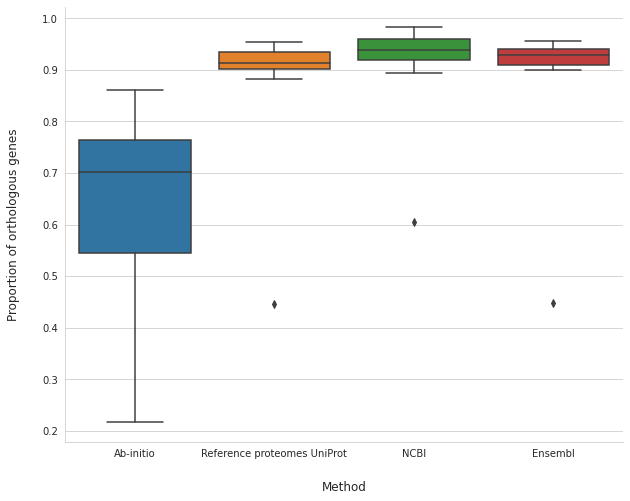

In [25]:
sns.set_style("whitegrid")
fig, ax= plt.subplots(figsize=(10,8))
fig = sns.boxplot(data=statsmerge, x='Method', y='Orthologs_norm')
ax.set_ylabel('Proportion of orthologous genes', labelpad=22, size=12)
ax.set_xlabel('Method', labelpad=22, size=12)
sns.despine()
plt.savefig('OrthologsIndex_byMethod.png',bbox_inches='tight', dpi=300)

## Proportion of orthologs vs assembly

In [14]:
speciesinfo=pd.read_csv('Species_info_paper.csv')
speciesinfo

,Class,Order,Family,Code,Closest Augustus species,Median divergence time estimate (MYa),Name,Species,Taxon ID,Assembly,...,Uniprot RefProt,Origin,Details,Gene count,Reviewed (Swiss-P),Prot count,2022_02 assembly,previous assembly,2022_02 source,previous source
0,Sarcopterygii/ Mammalia,Primates,Hominidae,HUMAN,human,0,homo sapiens,Homo sapiens,9606,https://www.ncbi.nlm.nih.gov/assembly/GCF_0000...,...,UP000005640,"Ensembl, \nGCA_000001405.27",NaN,"20,601","20,383",79740,GCA_000001405.27,GCA_000001405.27,Ensembl,Ensembl
1,Sarcopterygii/ Mammalia,Rodentia,Muridae,MOUSE,human,87,mus musculus,Mus musculus,10090,https://www.ncbi.nlm.nih.gov/assembly/GCA_0000...,...,UP000000589,"Ensembl, \nGCA_000001635.8",NaN,"21,984",17120,"55,315",GCA_000001635.8,GCA_000001635.8,Ensembl,Ensembl
2,Actinopterygii/ Actinopteri/ Teleostei,Cypriniformes,Cyprinidae,DANRE,zebrafish,0,danio rerio,Danio rerio,7955,https://www.ncbi.nlm.nih.gov/assembly/GCA_0000...,...,UP000000437,Ensembl,I am using the previous zfish (april/may?),"25,707 /20,366",3242,"46,687",GCF_000002035.6,GCA_000002035.4,Refseq,Ensembl
3,Aves,Galliformes,Phasianidae,CHICK,chicken,0,gallus gallus,Gallus gallus,9031,"GRCg6a, GCA_000002315.5, Mar 2018",...,UP000000539,"Ensembl, GCA_000002315.5",NaN,"18,108","2,301",27530,GCA_000002315.5,GCA_000002315.5,Ensembl,Ensembl
4,Ascidiacea,Phlebobranchia,Cionidae,CIOIN,ciona,0,ciona intestinalis,Ciona intestinalis,7719,https://www.ebi.ac.uk/ena/browser/view/GCA_000...,...,UP000008144,"Ensembl, GCA_000224145.1",NaN,16680,27,"17,311",GCA_000224145.1,GCA_000224145.1,Ensembl,Ensembl
5,Aves,Psittaciformes,Strigopidae,KAKAP,chicken,91,strigops habroptila,Strigops habroptila (kakapo),2489341,"bStrHab1_v1.p, INSDC Assembly GCA_004027225.1,...",...,UP000472266,\nGCA_004027225.1 from Ensembl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Sarcopterygii/ Aves,Passeriformes,Estrildidae,TAEGU,chicken,91,taeniopygia guttata,Taeniopygia guttata (zebra finch),59729,"bTaeGut1_v1.p, GCA_003957565.2",...,UP000007754,GCA_003957565.2 from Ensembl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Actinopterygii/ Actinopteri/ Holostei,Lepisosteiformes,Lepisosteidae,LEPOC,zebrafish,321,lepisosteus oculatus,Lepisosteus oculatus (spotted gar),7918,"LepOcu1, GCA_000242695.1",...,UP000018468,GCA_000242695.1 from Ensembl,Also QfO RefProt,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Actinopterygii/ Actinopteri/ Holostei,Gadiformes,Gadidae,GADMO,zebrafish,224,gadus morhua,Gadus morhua (atlantic cod?),8049,"gadMor3.0, GCA_902167405.1",...,UP000694546,GCA_902167405.1 from Ensembl,OMARK: missing 9% genes? (Acanthomorphata). BE...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Sarcopterygii/ Reptilia,Testudines,Emydidae,CHPIB,chicken,261,chrysemys picta bellii,Chrysemys picta bellii,8478,"Chrysemys_picta_bellii-3.0.3, GCA_000241765.2,...",...,UP000694380,GCA_000241765.2 from Ensembl\n,BUSCO: all missing??,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
from pandas.api.types import CategoricalDtype
speciesorder = CategoricalDtype(['CIOIN','ERCAL', 'LEPOC', 'DANRE', 'SALTR', 'GADMO', 'ECNAU','ORYLA', 
                                 'XENTR','PODMU', 'CHPIB','CHICK','TAEGU', 'KAKAP',   
                                  'ORANA', 'SARHA', 'PHOSI','FELCA', 'MOUSE','HUMAN'], 
                                ordered=True)
stats2['Species'] = stats2['Species'].astype(speciesorder)
stats2=stats2.sort_values('Species')

In [77]:
statsmerge['Species']=statsmerge['Species'].astype(speciesorder)
statsmerge=statsmerge.sort_values('Species')

In [107]:
stats2['Method'] = stats2['Method'].replace('Reference proteomes UniProt', 'UniProt')

## Merge plots

In [26]:
mypaleta=['#BF812D', '#F6E8C3', '#C7EAE5', '#35978F']

In [51]:
corrm=pd.DataFrame({'Me': ['Ab-initio', 'Reference proteomes UniProt', 'Ensembl', 'NCBI'],
                   'Method': ['Ab-initio', 'UniProt', 'Ensembl', 'NCBI']})

In [52]:
mes=['Ab-initio', 'Reference proteomes UniProt', 'Ensembl', 'NCBI']
methodsorder = CategoricalDtype(mes, ordered=True)
statsmerge['Method'] = statsmerge['Method'].astype(methodsorder)
statsmerge['Method']= statsmerge['Method'].map(corrm.set_index('Me')['Method'])

In [56]:
mypaleta=['#BF812D', '#E2D7A1',  '#A8DFD4', '#35978F'] #darker colours

([], [])

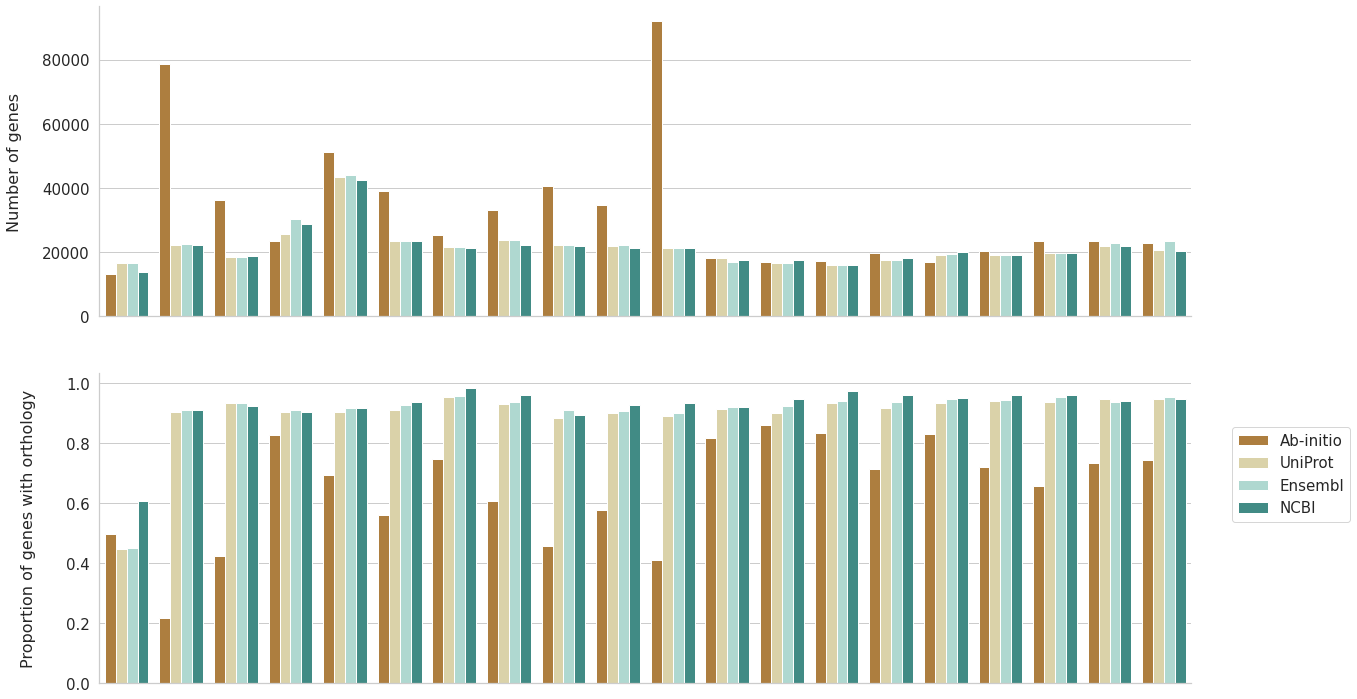

In [108]:
sns.set_context("notebook")
sns.set_style("whitegrid")
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(20,11))

fig = sns.barplot(data=stats2, x='Species', y= 'count', hue='Method', 
                   order= especies, #['CIOIN', 'LEPOC', 'DANRE', 'SALTR', 'GADMO', 'ORYLA', 'ECNAU', 'ERCAL', 'XENTR', 'CHPIB', 'CHICK', 'KAKAP', 'TAEGU', 'PODMU', 'ORANA', 'SARHA', 'HUMAN', 'MOUSE', 'FELCA', 'PHOSI'],
                   hue_order=['Ab-initio', 'UniProt', 'Ensembl', 'NCBI'],
                  ax=ax1, palette=mypaleta, edgecolor= 'white') #


fig = sns.barplot(data=statsmerge, x='Species', y= 'Orthologs_norm', hue='Method', 
                   order= especies,#['CIOIN', 'LEPOC', 'DANRE', 'SALTR', 'GADMO', 'ORYLA', 'ECNAU', 'ERCAL', 'XENTR', 'CHPIB', 'CHICK', 'KAKAP', 'TAEGU', 'PODMU', 'ORANA', 'SARHA', 'HUMAN', 'MOUSE', 'FELCA', 'PHOSI'],
                   hue_order=['Ab-initio', 'UniProt', 'Ensembl', 'NCBI'],
                ax=ax2, palette=mypaleta, edgecolor='white')

ax1.set(xlabel=None)
ax2.set(xlabel=None)
ax1.get_legend().remove()
ax1.set_ylabel('Number of genes', labelpad=20, size=16)
#ax1.set(ylabel='Number of genes')
ax2.set_ylabel('Proportion of genes with orthology', labelpad=30, size=16)
ax2.legend(bbox_to_anchor=(1.03, 0.85),  fontsize=15)
#sns.move_legend(ax2, "upper left", bbox_to_anchor=(1, 1.3))
sns.despine()
#plt.legend(bbox_to_anchor=(0.05, 0.85), loc='upper left', title= "Parameters species")

ax1.tick_params(axis='y', labelsize=15)
ax2.tick_params(axis='y', labelsize=15)

plt.tight_layout(pad=4)
plt.xticks([],)
#plt.show()
#plt.savefig('TwoPlots2.pdf',bbox_inches='tight', dpi=300)

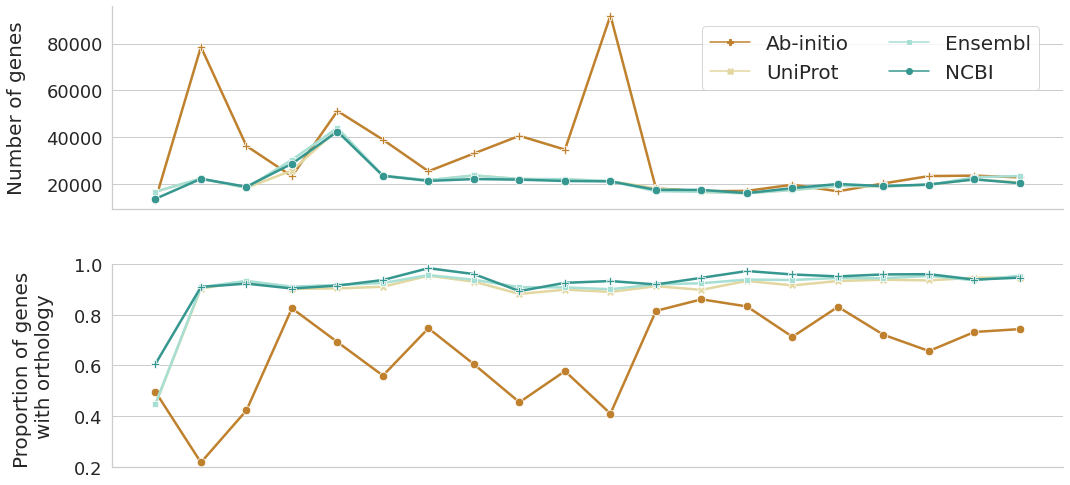

In [128]:
sns.set_context("notebook")
sns.set_style("whitegrid")
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(16,8))

fig=sns.lineplot(data=stats2,x="Species", y="count", hue="Method",palette=mypaleta,hue_order=['Ab-initio', 'UniProt', 'Ensembl', 'NCBI'],
                  style="Method",linewidth=2.5, markersize=8.5, markers=True, dashes=False, ax=ax1)

fig=sns.lineplot(data=statsmerge,x="Species", y="Orthologs_norm", hue="Method",palette=mypaleta,
                  style="Method",linewidth=2.5, markersize=8.5, markers=True, dashes=False, ax=ax2)

ax1.set(xlabel=None)
ax2.set(xlabel=None)
ax2.get_legend().remove()
ax1.set_ylabel('Number of genes', labelpad=20, size=20)
#ax1.set(ylabel='Number of genes')

ax2.set_ylabel('Proportion of genes \nwith orthology', labelpad=20, size=20)
ax2.set_ylim([0.2,1.0])
ax1.legend(bbox_to_anchor=(0.61, 0.95), ncol=2, fontsize=20)
#sns.move_legend(ax2, "upper left", bbox_to_anchor=(1, 1.3))
sns.despine()
#plt.legend(bbox_to_anchor=(0.05, 0.85), loc='upper left', title= "Parameters species")

ax1.tick_params(axis='y', labelsize=18)
ax2.tick_params(axis='y', labelsize=18)

plt.tight_layout(pad=4)
plt.xticks([],)
#plt.show()
plt.savefig('TwoPlots2-lineplots.png',bbox_inches='tight', dpi=300)

## Tree

In [7]:
import toytree
import toyplot

In [8]:
tre = toytree.tree("https://eaton-lab.org/data/Cyathophora.tre")
tre2=toytree.tree('species20tree.nwk')
tre3=toytree.tree('cladogram20species.nwk')
#tre3=toytree.tree("((((((((PHOSI,FELCA),(MOUSE,HUMAN)),SARHA:3),ORANA:4),(PODMU:4,(((TAEGU,KAKAP),CHICK:2),CHPIB:3))),XENTR:6),(ERCAL:6,(((((ECNAU,ORYLA),GADMO:2),SALTR:3),DANRE:4),LEPOC:5))),CIOIN:8);")

In [9]:
newlabels=['Homo sapiens','Mus musculus','Felis catus','Phocoena sinus','Sarcophilus harrisii ', 'Ornithorhynchus anatinus',
 'Strigops habroptila', 'Taeniopygia guttata','Gallus gallus','Chrysemys picta bellii','Podarcis muralis',
 'Xenopus tropicalis','Oryzias latipes','Echeneis naucrates','Gadus morhua', 'Salmo trutta','Danio rerio',
 'Lepisosteus oculatus', 'Erpetoichthys calabaricus','Ciona intestinalis']

In [10]:
tip_labels_estilo={
        "fill": "#262626",
        "font-size": "14px",
        "-toyplot-anchor-shift": "10px",
    }

In [11]:
# make the canvas and axes
canvas = toyplot.Canvas(width=1100, height=400)
axes = canvas.cartesian()
axes.show = False

# draw a rectangle (x1, x2, y1, y2)
axes.rectangle(
    -5.5, 0.35, -4.5, 21,
    opacity=0.25,
    color="darkred",
)

#draw a rectangle (x1, x2, y1, y2)
axes.rectangle(
    -8.5, -5.6, -2.5, 21,
    opacity=0.25,
    color="#1A8828",
)

axes.rectangle(
    -16.5, -11.5, -4.5, 21,
    opacity=0.25,
    color=toytree.colors[2],
)


# add tree to the axes
tre3.draw(layout='u',axes=axes,tip_labels=newlabels, tip_labels_style=tip_labels_estilo);

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="1100.0px" height="400.0px" viewBox="0 0 1100.0 400.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t71333ee151ab494184bd0e44bb93b9e5"> Homo sapiens Mus musculus Felis catus Phocoena sinus Sarcophilus harrisii Ornithorhynchus anatinus Strigops habroptila Taeniopygia guttata Gallus gallus Chrysemys picta bellii Podarcis muralis Xenopus tropicalis Oryzias latipes Echeneis naucrates Gadus morhua Salmo trutta Danio rerio Lepisosteus oculatus Erpetoichthys calabaricus Ciona intestinalis

In [31]:
# make the canvas and axes
canvas = toyplot.Canvas(width=700, height=180)
axes = canvas.cartesian()
axes.show = False

# draw a rectangle (x1, x2, y1, y2) - RED
axes.rectangle(
    -5.5, 0.35, -4.5, 7,
    opacity=0.25,
    color="darkred",
)

#draw a rectangle (x1, x2, y1, y2) - GREEN
axes.rectangle(
    -8.5, -5.6, -2.5, 7,
    opacity=0.25,
    color="#1A8828",
)

#BLUE
axes.rectangle(
    -16.5, -11.5, -4.5, 7,
    opacity=0.25,
    color=toytree.colors[2],
)
# add tree to the axes
tre3.draw(layout='u',axes=axes, tip_labels=False);

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="700.0px" height="180.0px" viewBox="0 0 700.0 180.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="tea87040fe8a9459eb1b81c2cf2feed2e">

In [32]:
import toyplot.svg
toyplot.svg.render(canvas, "tree-plot2-noname.svg")

In [21]:
toyplot.html.render(canvas, "/tmp/tree-plot2.html")

In [13]:
tre3.draw(
    layout='u',
    width=980,
    height=250,
);

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="980.0px" height="250.0px" viewBox="0 0 980.0 250.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t93e5528747b244979075ebc7b4f0e8fc"> HUMAN MOUSE FELCA PHOSI SARHA ORANA KAKAP TAEGU CHICK CHPIB PODMU XENTR ORYLA ECNAU GADMO SALTR DANRE LEPOC ERCAL CIOIN

In [14]:
tre2.draw(layout="u",tip_labels_align=True);

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="360.0px" height="275.0px" viewBox="0 0 360.0 275.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="td97b12706da0419ebb53feed313563ec"> HUMAN MOUSE FELCA PHOSI SARHA ORANA KAKAP TAEGU CHICK CHPIB PODMU XENTR ORYLA ECNAU GADMO SALTR DANRE LEPOC ERCAL CIOIN

In [42]:
especies=tre2.get_tip_labels()

In [43]:
especies

['HUMAN',
 'MOUSE',
 'FELCA',
 'PHOSI',
 'SARHA',
 'ORANA',
 'KAKAP',
 'TAEGU',
 'CHICK',
 'CHPIB',
 'PODMU',
 'XENTR',
 'ORYLA',
 'ECNAU',
 'GADMO',
 'SALTR',
 'DANRE',
 'LEPOC',
 'ERCAL',
 'CIOIN']

In [44]:
especies.reverse()
especies

['CIOIN',
 'ERCAL',
 'LEPOC',
 'DANRE',
 'SALTR',
 'GADMO',
 'ECNAU',
 'ORYLA',
 'XENTR',
 'PODMU',
 'CHPIB',
 'CHICK',
 'TAEGU',
 'KAKAP',
 'ORANA',
 'SARHA',
 'PHOSI',
 'FELCA',
 'MOUSE',
 'HUMAN']

In [ ]:
tre3.draw(ts='s', layout='u'); #With 's' ts --> cladogram, only found after adapting branch distances in tre3 (cladogram20species.nwk)

In [40]:
tre2.root(names='CIOIN')

In [44]:
styledict={"tip_labels_align": True, "layout": "u"}

In [66]:
tre2.features

{'dist', 'height', 'idx', 'name', 'support'}

In [68]:
tre2.get_node_values('ndesc', True, True)

array(['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', ''], dtype='<U1')